In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gc
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import json

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth', 5000)
pd.options.display.float_format = '{:.3f}'.format
%matplotlib inline
plt.style.use('fivethirtyeight')

import os
DIR_NAME = "../data/features"
print(os.listdir(DIR_NAME))

['.ipynb_checkpoints', '20190726_data_dtypes.json', '20190731_data_dtypes.json', 'test.csv', 'train.csv', 'train_20190801_bkup.csv', 'train_20190802_bak.csv']


In [2]:
import mglearn

# import data

In [3]:
# load csv
def load_dir_csv(directory, csv_files=None, index_column=0):
    if csv_files is None:
        csv_files = sorted( [ f for f in os.listdir(directory) if f.endswith(".csv") ])    
    csv_vars  = [ filename[:-4] for filename in csv_files ]
    gdict = globals()
    for filename, var in zip( csv_files, csv_vars ):
        print(f"{var:32s} = pd.read_csv({directory}/{filename}, index_col={index_column})")
        gdict[var] = pd.read_csv( f"{directory}/{filename}" , index_col=index_column )
        print(f"{'shape ':32s} = " + str(gdict[var].shape))
        display(gdict[var].head())

In [4]:
%%time
load_dir_csv(DIR_NAME)

test                             = pd.read_csv(../data/features/test.csv, index_col=0)
shape                            = (313, 42)


,id,year,stage,match,gameday,time,home,away,stadium,tv,address,capa,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_team,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
0,15822,2014,Ｊ１,第１８節第１日,08/02(土),19:04,ベガルタ仙台,大宮アルディージャ,ユアテックスタジアム仙台,スカパー！／スカパー！プレミアムサービス,宮城県仙台市泉区七北田字柳78,19694,2,2,晴,27.400,70%,中村 太,ベガルタ仙台,関 憲太郎,菅井 直樹,渡辺 広大,鎌田 次郎,石川 直樹,太田 吉彰,富田 晋伍,角田 誠,梁 勇基,赤嶺 真吾,ウイルソン,大宮アルディージャ,清水 慶記,中村 北斗,今井 智基,横山 知伸,高橋 祥平,橋本 晃司,和田 拓也,家長 昭博,富山 貴光,ムルジャ,ズラタン
1,15823,2014,Ｊ１,第１８節第１日,08/02(土),18:34,鹿島アントラーズ,サンフレッチェ広島,県立カシマサッカースタジアム,スカパー！／スカパー！プレミアムサービス,茨城県鹿嶋市神向寺後山26-2,40728,5,1,晴,30.800,65%,扇谷 健司,鹿島アントラーズ,曽ヶ端 準,西 大伍,植田 直通,昌子 源,山本 脩斗,柴崎 岳,小笠原 満男,カイオ,中村 充孝,土居 聖真,ダヴィ,サンフレッチェ広島,増田 卓也,塩谷 司,千葉 和彦,水本 裕貴,柏 好文,柴﨑 晃誠,森﨑 和幸,山岸 智,石原 直樹,髙萩 洋次郎,佐藤 寿人
2,15824,2014,Ｊ１,第１８節第１日,08/02(土),19:04,浦和レッズ,ヴィッセル神戸,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／ＮＨＫ ＢＳ１／テレ玉,埼玉県さいたま市緑区中野田500,63700,2,2,晴,31.700,58%,松尾 一,浦和レッズ,西川 周作,森脇 良太,那須 大亮,槙野 智章,平川 忠亮,鈴木 啓太,阿部 勇樹,宇賀神 友弥,柏木 陽介,梅崎 司,興梠 慎三,ヴィッセル神戸,山本 海人,河本 裕之,増川 隆洋,大屋 翼,橋本 英郎,杉浦 恭平,奥井 諒,高橋 峻希,小川 慶治朗,森岡 亮太,マルキーニョス
3,15825,2014,Ｊ１,第１８節第１日,08/02(土),19:03,柏レイソル,川崎フロンターレ,日立柏サッカー場,スカパー！／スカパー！プレミアムサービス,千葉県柏市日立台1-2-50,15349,4,1,晴,29.300,76%,高山 啓義,柏レイソル,菅野 孝憲,藤田 優人,鈴木 大輔,増嶋 竜也,橋本 和,秋野 央樹,栗澤 僚一,大谷 秀和,高山 薫,レアンドロ,工藤 壮人,川崎フロンターレ,杉山 力裕,小宮山 尊信,實藤 友紀,谷口 彰悟,登里 享平,大島 僚太,中村 憲剛,森谷 賢太郎,金久保 順,小林 悠,大久保 嘉人
4,15827,2014,Ｊ１,第１８節第１日,08/02(土),19:03,アルビレックス新潟,セレッソ大阪,デンカビッグスワンスタジアム,スカパー！／スカパー！プレミアムサービス,新潟県新潟市中央区清五郎67-12,42300,1,0,晴,30.400,68%,今村 義朗,アルビレックス新潟,守田 達弥,松原 健,舞行龍ジェームズ,大井 健太郎,李 明載,レオ シルバ,小林 裕紀,山本 康裕,田中 亜土夢,田中 達也,岡本 英也,セレッソ大阪,キム ジンヒョン,藤本 康太,丸橋 祐介,安藤 淳,山下 達也,扇原 貴宏,山口 蛍,キム ソンジュン,フォルラン,南野 拓実,杉本 健勇


train                            = pd.read_csv(../data/features/train.csv, index_col=0)
shape                            = (1952, 43)


,id,y,year,stage,match,gameday,time,home,away,stadium,tv,address,capa,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_team,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合,宮城県仙台市泉区七北田字柳78,19694,1,0,雨,3.800,66%,木村 博之,ベガルタ仙台,林 卓人,菅井 直樹,鎌田 次郎,上本 大海,田村 直也,富田 晋伍,角田 誠,太田 吉彰,関口 訓充,ウイルソン,赤嶺 真吾,鹿島アントラーズ,曽ヶ端 準,新井場 徹,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋,愛知県豊田市千石町7-2,40000,1,0,屋内,12.400,43%,西村 雄一,名古屋グランパス,楢﨑 正剛,田中 隼磨,田中 マルクス闘莉王,増川 隆洋,阿部 翔平,中村 直志,ダニルソン,藤本 淳吾,金崎 夢生,ケネディ,玉田 圭司,清水エスパルス,林 彰洋,吉田 豊,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪,大阪府吹田市千里万博公園5-2,21000,2,3,晴一時雨,11.300,41%,高山 啓義,ガンバ大阪,藤ヶ谷 陽介,加地 亮,中澤 聡太,今野 泰幸,藤春 廣輝,明神 智和,遠藤 保仁,佐々木 勇人,二川 孝広,ラフィーニャ,パウリーニョ,ヴィッセル神戸,徳重 健太,近藤 岳登,北本 久仁衛,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島,広島県広島市安佐南区大塚西5-1-1,50000,1,0,曇一時雨のち晴,11.400,52%,松尾 一,サンフレッチェ広島,西川 周作,森脇 良太,千葉 和彦,水本 裕貴,ミキッチ,青山 敏弘,森﨑 和幸,山岸 智,石原 直樹,髙萩 洋次郎,佐藤 寿人,浦和レッズ,加藤 順大,濱田 水輝,阿部 勇樹,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌,北海道札幌市豊平区羊ヶ丘1,39232,0,0,屋内,22.500,32%,廣瀬 格,コンサドーレ札幌,李 昊乗,高木 純平,ジェイド ノース,奈良 竜樹,岩沼 俊介,河合 竜二,山本 真希,近藤 祐介,内村 圭宏,岡本 賢明,前田 俊介,ジュビロ磐田,川口 能活,駒野 友一,チョ ビョングク,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一


train_20190801_bkup              = pd.read_csv(../data/features/train_20190801_bkup.csv, index_col=0)
shape                            = (1953, 43)


,id,y,year,stage,match,gameday,time,home,away,stadium,tv,address,capa,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_team,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合,宮城県仙台市泉区七北田字柳78,19694,1,0,雨,3.800,66%,木村 博之,ベガルタ仙台,林 卓人,菅井 直樹,鎌田 次郎,上本 大海,田村 直也,富田 晋伍,角田 誠,太田 吉彰,関口 訓充,ウイルソン,赤嶺 真吾,鹿島アントラーズ,曽ヶ端 準,新井場 徹,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋,愛知県豊田市千石町7-2,40000,1,0,屋内,12.400,43%,西村 雄一,名古屋グランパス,楢﨑 正剛,田中 隼磨,田中 マルクス闘莉王,増川 隆洋,阿部 翔平,中村 直志,ダニルソン,藤本 淳吾,金崎 夢生,ケネディ,玉田 圭司,清水エスパルス,林 彰洋,吉田 豊,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪,大阪府吹田市千里万博公園5-2,21000,2,3,晴一時雨,11.300,41%,高山 啓義,ガンバ大阪,藤ヶ谷 陽介,加地 亮,中澤 聡太,今野 泰幸,藤春 廣輝,明神 智和,遠藤 保仁,佐々木 勇人,二川 孝広,ラフィーニャ,パウリーニョ,ヴィッセル神戸,徳重 健太,近藤 岳登,北本 久仁衛,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島,広島県広島市安佐南区大塚西5-1-1,50000,1,0,曇一時雨のち晴,11.400,52%,松尾 一,サンフレッチェ広島,西川 周作,森脇 良太,千葉 和彦,水本 裕貴,ミキッチ,青山 敏弘,森﨑 和幸,山岸 智,石原 直樹,髙萩 洋次郎,佐藤 寿人,浦和レッズ,加藤 順大,濱田 水輝,阿部 勇樹,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌,北海道札幌市豊平区羊ヶ丘1,39232,0,0,屋内,22.500,32%,廣瀬 格,コンサドーレ札幌,李 昊乗,高木 純平,ジェイド ノース,奈良 竜樹,岩沼 俊介,河合 竜二,山本 真希,近藤 祐介,内村 圭宏,岡本 賢明,前田 俊介,ジュビロ磐田,川口 能活,駒野 友一,チョ ビョングク,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一


train_20190802_bak               = pd.read_csv(../data/features/train_20190802_bak.csv, index_col=0)
shape                            = (1952, 43)


,id,y,year,stage,match,gameday,time,home,away,stadium,tv,address,capa,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_team,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合,宮城県仙台市泉区七北田字柳78,19694,1,0,雨,3.800,66%,木村 博之,ベガルタ仙台,林 卓人,菅井 直樹,鎌田 次郎,上本 大海,田村 直也,富田 晋伍,角田 誠,太田 吉彰,関口 訓充,ウイルソン,赤嶺 真吾,鹿島アントラーズ,曽ヶ端 準,新井場 徹,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋,愛知県豊田市千石町7-2,40000,1,0,屋内,12.400,43%,西村 雄一,名古屋グランパス,楢﨑 正剛,田中 隼磨,田中 マルクス闘莉王,増川 隆洋,阿部 翔平,中村 直志,ダニルソン,藤本 淳吾,金崎 夢生,ケネディ,玉田 圭司,清水エスパルス,林 彰洋,吉田 豊,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪,大阪府吹田市千里万博公園5-2,21000,2,3,晴一時雨,11.300,41%,高山 啓義,ガンバ大阪,藤ヶ谷 陽介,加地 亮,中澤 聡太,今野 泰幸,藤春 廣輝,明神 智和,遠藤 保仁,佐々木 勇人,二川 孝広,ラフィーニャ,パウリーニョ,ヴィッセル神戸,徳重 健太,近藤 岳登,北本 久仁衛,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島,広島県広島市安佐南区大塚西5-1-1,50000,1,0,曇一時雨のち晴,11.400,52%,松尾 一,サンフレッチェ広島,西川 周作,森脇 良太,千葉 和彦,水本 裕貴,ミキッチ,青山 敏弘,森﨑 和幸,山岸 智,石原 直樹,髙萩 洋次郎,佐藤 寿人,浦和レッズ,加藤 順大,濱田 水輝,阿部 勇樹,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌,北海道札幌市豊平区羊ヶ丘1,39232,0,0,屋内,22.500,32%,廣瀬 格,コンサドーレ札幌,李 昊乗,高木 純平,ジェイド ノース,奈良 竜樹,岩沼 俊介,河合 竜二,山本 真希,近藤 祐介,内村 圭宏,岡本 賢明,前田 俊介,ジュビロ磐田,川口 能活,駒野 友一,チョ ビョングク,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一


CPU times: user 283 ms, sys: 39 ms, total: 322 ms
Wall time: 410 ms


# ベースラインモデルの作成

定量的データ（初めから数値のデータ）のみで一度モデルを作成してみる

## データの抽出 & 学習データと検証データに分割

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train = train[['year', 'capa', 'home_score', 'away_score', 'temperature']].copy()
y_train = train['y'].copy()

In [8]:
X_train.shape, y_train.shape

((1952, 5), (1952,))

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [10]:
# 学習データの形状 5つの特徴量
X_train.shape, y_train.shape

((1366, 5), (1366,))

In [11]:
# テストデータの形状 学習データの30%をテストデータに
X_valid.shape, y_valid.shape

((586, 5), (586,))

## 学習

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [6]:
# 今回のコンペの評価関数がRSMEなので、その値を計算する関数を定義
def cal_rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [14]:
# パラメータを指定して、グリッドサーチしてみる
parameters = {
    "n_estimators":[5, 10, 30, 50], # 決定木の個数
    "max_depth":[5, 10, 20, 30, 50], # 決定木の深さの最大値
    "random_state":[0]
}

In [15]:
reg_rf = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=parameters,
    cv=5,
    n_jobs=-1
)

In [16]:
%%time
reg_rf = reg_rf.fit(X_train, y_train)

CPU times: user 257 ms, sys: 42 ms, total: 299 ms
Wall time: 4.62 s


In [17]:
# 一番結果の良かったパラメータを出力
print(reg_rf.best_estimator_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)


In [18]:
# validデータで推論
pred = reg_rf.predict(X_valid)

In [19]:
# 検証データでの精度確認
# 小さい方が精度が良い
cal_rmse(y_valid, pred)

4595.131272336649

In [20]:
# テストデータから、学習データに用いたデータと同じカラムを取得
X_test = test[['year', 'capa', 'home_score', 'away_score', 'temperature']].copy()

In [21]:
# テストデータで推論
y_pred = reg_rf.predict(X_test)

In [22]:
y_pred.shape

(313,)

# 提出データの生成

In [23]:
sub = pd.read_csv('../data/raw/sample_submit.csv', header=None)

In [24]:
sub.head()

,0,1
0,15822,10662.395
1,15823,10662.395
2,15824,10662.395
3,15825,10662.395
4,15827,10662.395


In [25]:
sub.shape

(313, 2)

In [26]:
sub[1] = y_pred

In [27]:
sub.head()

,0,1
0,15822,12508.750
1,15823,17356.400
2,15824,33904.700
3,15825,10004.834
4,15827,27915.262


In [28]:
sub.describe()

,0,1
count,313.000,313.000
mean,16142.252,11275.444
std,224.441,7503.127
min,15822.000,2810.125
25%,15907.000,6177.886
50%,16261.000,9322.282
75%,16346.000,12933.780
max,16436.000,46434.067


### 結果は4758.9

In [29]:
# 保存
sub.to_csv('../data/submission/submission.csv', index=False)

# shnagai EDA
- まずは学習データを覗いてみよう

In [7]:
train_df = pd.read_csv('../data/features/train.csv')
test_df = pd.read_csv('../data/features/test.csv')

In [31]:
train_df.tail(5)

,Unnamed: 0,id,y,year,stage,match,gameday,time,home,away,stadium,tv,address,capa,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_team,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
1947,1948,16234,7842,2014,Ｊ２,第２４節第１日,07/30(水),19:04,ジュビロ磐田,カマタマーレ讃岐,ヤマハスタジアム（磐田）,スカパー！／スカパー！プレミアムサービス,静岡県磐田市新貝2500,15165,4,2,晴,26.700,80%,福島 孝一郎,ジュビロ磐田,八田 直樹,櫻内 渚,菅沼 駿哉,伊野波 雅彦,森下 俊,藤田 義明,フェルジナンド,チンガ,ペク ソンドン,山崎 亮平,阿部 吉朗,カマタマーレ讃岐,瀬口 拓弥,武田 有祐,大杉 誠人,藤井 航大,沼田 圭悟,堀河 俊大,岡村 和哉,山本 翔平,小澤 雄希,西野 泰正,古田 寛幸
1948,1949,16235,5212,2014,Ｊ２,第２４節第１日,07/30(水),19:04,ＦＣ岐阜,ファジアーノ岡山,岐阜メモリアルセンター長良川競技場,スカパー！／スカパー！プレミアムサービス,岐阜県岐阜市長良福光大野2675-28,20000,2,2,晴,28.000,78%,野田 祐樹,ＦＣ岐阜,川口 能活,田中 秀人,中村 英之,阿部 正紀,関田 寛士,水野 泰輔,清本 拓己,益山 司,髙地 系治,遠藤 純輝,ナザリト,ファジアーノ岡山,中林 洋次,久木田 紳吾,後藤 圭太,田所 諒,田中 奏一,千明 聖典,上田 康太,三村 真,片山 瑛一,妹尾 隆佑,久保 裕一
1949,1950,16236,3883,2014,Ｊ２,第２４節第１日,07/30(水),19:03,アビスパ福岡,湘南ベルマーレ,レベルファイブスタジアム,スカパー！／スカパー！プレミアムサービス,福岡県福岡市博多区東平尾公園2-1-1,22563,0,0,曇,25.400,83%,窪田 陽輔,アビスパ福岡,神山 竜一,阿部 巧,パク ゴン,イ グァンソン,堤 俊輔,中原 秀人,武田 英二郎,金森 健志,石津 大介,城後 寿,酒井 宣福,湘南ベルマーレ,秋元 陽太,遠藤 航,丸山 祐市,三竿 雄斗,藤田 征也,岩尾 憲,菊地 俊介,菊池 大介,岡田 翔平,ウェリントン,武富 孝介
1950,1951,16237,5028,2014,Ｊ２,第２４節第１日,07/30(水),19:03,大分トリニータ,栃木ＳＣ,大分銀行ドーム,スカパー！／スカパー！プレミアムサービス,大分県大分市大字横尾1351,40000,2,1,雨時々曇,25.400,84%,小屋 幸栄,大分トリニータ,武田 洋平,安川 有,高木 和道,若狭 大志,松本 怜,伊藤 大介,為田 大貴,キム ジョンヒョン,松本 昌也,林 容平,ラドンチッチ,栃木ＳＣ,鈴木 智幸,赤井 秀行,岡根 直哉,ドゥドゥ,菅 和範,近藤 祐介,西澤 代志也,小野寺 達也,中美 慶哉,重松 健太郎,大久保 哲哉
1951,1952,16238,2221,2014,Ｊ２,第２４節第１日,07/30(水),19:34,ザスパクサツ群馬,ギラヴァンツ北九州,正田醤油スタジアム群馬,スカパー！／スカパー！プレミアムサービス,群馬県前橋市敷島町66,15135,0,0,晴,27.900,61%,三上 正一郎,ザスパクサツ群馬,富居 大樹,小柳 達司,クォン ハンジン,青木 良太,瀬川 和樹,坂井 洋平,加藤 弘堅,永田 亮太,青木 孝太,ダニエル ロビーニョ,宮崎 泰右,ギラヴァンツ北九州,大谷 幸輝,宮本 亨,渡邉 将基,前田 和哉,冨士 祐樹,八角 剛史,風間 宏希,小手川 宏基,井上 翔太,渡 大生,大島 秀夫


In [32]:
test_df.head(3)

,Unnamed: 0,id,year,stage,match,gameday,time,home,away,stadium,tv,address,capa,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_team,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
0,0,15822,2014,Ｊ１,第１８節第１日,08/02(土),19:04,ベガルタ仙台,大宮アルディージャ,ユアテックスタジアム仙台,スカパー！／スカパー！プレミアムサービス,宮城県仙台市泉区七北田字柳78,19694,2,2,晴,27.400,70%,中村 太,ベガルタ仙台,関 憲太郎,菅井 直樹,渡辺 広大,鎌田 次郎,石川 直樹,太田 吉彰,富田 晋伍,角田 誠,梁 勇基,赤嶺 真吾,ウイルソン,大宮アルディージャ,清水 慶記,中村 北斗,今井 智基,横山 知伸,高橋 祥平,橋本 晃司,和田 拓也,家長 昭博,富山 貴光,ムルジャ,ズラタン
1,1,15823,2014,Ｊ１,第１８節第１日,08/02(土),18:34,鹿島アントラーズ,サンフレッチェ広島,県立カシマサッカースタジアム,スカパー！／スカパー！プレミアムサービス,茨城県鹿嶋市神向寺後山26-2,40728,5,1,晴,30.800,65%,扇谷 健司,鹿島アントラーズ,曽ヶ端 準,西 大伍,植田 直通,昌子 源,山本 脩斗,柴崎 岳,小笠原 満男,カイオ,中村 充孝,土居 聖真,ダヴィ,サンフレッチェ広島,増田 卓也,塩谷 司,千葉 和彦,水本 裕貴,柏 好文,柴﨑 晃誠,森﨑 和幸,山岸 智,石原 直樹,髙萩 洋次郎,佐藤 寿人
2,2,15824,2014,Ｊ１,第１８節第１日,08/02(土),19:04,浦和レッズ,ヴィッセル神戸,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／ＮＨＫ ＢＳ１／テレ玉,埼玉県さいたま市緑区中野田500,63700,2,2,晴,31.700,58%,松尾 一,浦和レッズ,西川 周作,森脇 良太,那須 大亮,槙野 智章,平川 忠亮,鈴木 啓太,阿部 勇樹,宇賀神 友弥,柏木 陽介,梅崎 司,興梠 慎三,ヴィッセル神戸,山本 海人,河本 裕之,増川 隆洋,大屋 翼,橋本 英郎,杉浦 恭平,奥井 諒,高橋 峻希,小川 慶治朗,森岡 亮太,マルキーニョス


- テストデータは今回の測定用のデータとなる。
- homeとhome_teamは同じ。awayも同じく。

- yが正解ラベル
- 欠損データはなさそうだな
- 1953件で、43の特徴量と1つのラベルがある


In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 44 columns):
Unnamed: 0     1952 non-null int64
id             1952 non-null int64
y              1952 non-null int64
year           1952 non-null int64
stage          1952 non-null object
match          1952 non-null object
gameday        1952 non-null object
time           1952 non-null object
home           1952 non-null object
away           1952 non-null object
stadium        1952 non-null object
tv             1952 non-null object
address        1952 non-null object
capa           1952 non-null int64
home_score     1952 non-null int64
away_score     1952 non-null int64
weather        1952 non-null object
temperature    1952 non-null float64
humidity       1952 non-null object
referee        1952 non-null object
home_team      1952 non-null object
home_01        1952 non-null object
home_02        1952 non-null object
home_03        1952 non-null object
home_04        1952 non-null object

In [34]:
train_df.shape

(1952, 44)

In [35]:
# 数値のデータについてばらつきが表示される
train_df.describe()

,Unnamed: 0,id,y,year,capa,home_score,away_score,temperature
count,1952.000,1952.000,1952.000,1952.000,1952.000,1952.000,1952.000,1952.000
mean,975.697,15049.110,10635.004,2012.820,25669.076,1.366,1.204,20.441
std,563.913,646.259,8100.816,0.758,13994.077,1.203,1.126,6.440
min,0.000,13994.000,1104.000,2012.000,3560.000,0.000,0.000,1.400
25%,487.750,14481.750,4690.750,2012.000,15589.000,0.000,0.000,15.800
50%,975.500,15043.500,8600.500,2013.000,20246.000,1.000,1.000,21.400
75%,1463.250,15531.250,13472.250,2013.000,30132.000,2.000,2.000,25.600
max,1952.000,16238.000,62632.000,2014.000,72327.000,7.000,8.000,34.200


- yが0のやつは無観客試合ぽいな 消したほうがよさそう
- capaは、観客数予測するには重要な特徴量な気がするな
- ホームチーム(home)は重要な要素(熱心なサポータ)

In [8]:
# 無観客試合
train_df.query('y <= 0')

,Unnamed: 0,id,y,year,stage,match,gameday,time,home,away,stadium,tv,address,capa,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_team,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11


In [37]:
# 一応異常値をして消しておくか
train_df.drop(train.index[1567], inplace=True)

In [38]:
train_df.describe()

,Unnamed: 0,id,y,year,capa,home_score,away_score,temperature
count,1951.000,1951.000,1951.000,1951.000,1951.000,1951.000,1951.000,1951.000
mean,975.393,15048.775,10634.951,2012.819,25671.982,1.366,1.205,20.443
std,563.897,646.256,8102.892,0.758,13997.076,1.204,1.126,6.441
min,0.000,13994.000,1104.000,2012.000,3560.000,0.000,0.000,1.400
25%,487.500,14481.500,4689.500,2012.000,15589.000,0.000,0.000,15.800
50%,975.000,15043.000,8594.000,2013.000,20246.000,1.000,1.000,21.400
75%,1462.500,15530.500,13473.500,2013.000,30132.000,2.000,2.000,25.600
max,1952.000,16238.000,62632.000,2014.000,72327.000,7.000,8.000,34.200


In [39]:
train_df.shape

(1951, 44)

### 各特徴量を見ていく

In [40]:
# 日本語をmatplotlibで表示する
import japanize_matplotlib
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

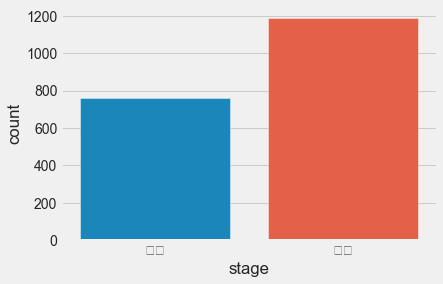

In [41]:
sns.countplot(train_df['stage'])

- J2の試合の方が多いのか！！多分、J1とJ2で観客数全然違うはず

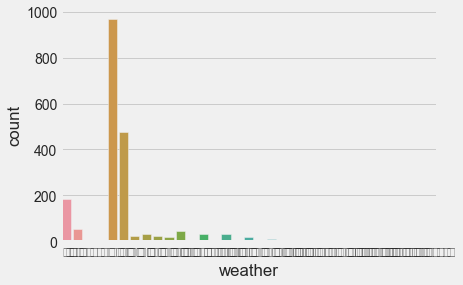

In [42]:
sns.countplot(train_df['weather'])

## カテゴリカルな列を型に変換する

- 大事そうな特徴量の中身を見てみる

In [43]:

for column in train_df.columns:
    print(column)

Unnamed: 0
id
y
year
stage
match
gameday
time
home
away
stadium
tv
address
capa
home_score
away_score
weather
temperature
humidity
referee
home_team
home_01
home_02
home_03
home_04
home_05
home_06
home_07
home_08
home_09
home_10
home_11
away_team
away_01
away_02
away_03
away_04
away_05
away_06
away_07
away_08
away_09
away_10
away_11


In [44]:
print('stage: {}'.format(train_df['stage'].nunique()))
print('home: {}'.format(train_df['home'].nunique()))
print('weather: {}'.format(train_df['weather'].nunique()))
print('timeキックオフ時間: {}'.format(train_df['time'].nunique()))
print('temperature: {}'.format(train_df['temperature'].nunique()))


stage: 2
home: 43
weather: 33
timeキックオフ時間: 63
temperature: 273


- 気温(temperature)は何パターンかに整形しないとカテゴライズなデータには出来ないな

In [45]:
#4つをひとまずカテゴリ型にしてみよう
train_df['stage'] = train_df['stage'].astype('category')
train_df['home'] = train_df['home'].astype('category')
train_df['weather'] = train_df['weather'].astype('category')
train_df['time'] = train_df['time'].astype('category')

In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1951 entries, 0 to 1951
Data columns (total 44 columns):
Unnamed: 0     1951 non-null int64
id             1951 non-null int64
y              1951 non-null int64
year           1951 non-null int64
stage          1951 non-null category
match          1951 non-null object
gameday        1951 non-null object
time           1951 non-null category
home           1951 non-null category
away           1951 non-null object
stadium        1951 non-null object
tv             1951 non-null object
address        1951 non-null object
capa           1951 non-null int64
home_score     1951 non-null int64
away_score     1951 non-null int64
weather        1951 non-null category
temperature    1951 non-null float64
humidity       1951 non-null object
referee        1951 non-null object
home_team      1951 non-null object
home_01        1951 non-null object
home_02        1951 non-null object
home_03        1951 non-null object
home_04        1951 non-nul

# 型の保存
import json

data_dtypes = {column:str(train_df[column].dtype) for column in train_df.columns}
json.dump(data_dtypes, open('../data/features/20190726_data_dtypes.json', 'w'))

In [47]:
# 型を指定して読み込み直す
train_df = pd.read_csv('../data/features/train.csv', dtype=json.load(open('../data/features/20190726_data_dtypes.json')))

In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 44 columns):
Unnamed: 0     1952 non-null int64
id             1952 non-null int64
y              1952 non-null int64
year           1952 non-null int64
stage          1952 non-null category
match          1952 non-null object
gameday        1952 non-null object
time           1952 non-null category
home           1952 non-null category
away           1952 non-null object
stadium        1952 non-null object
tv             1952 non-null object
address        1952 non-null object
capa           1952 non-null int64
home_score     1952 non-null int64
away_score     1952 non-null int64
weather        1952 non-null category
temperature    1952 non-null float64
humidity       1952 non-null object
referee        1952 non-null object
home_team      1952 non-null object
home_01        1952 non-null object
home_02        1952 non-null object
home_03        1952 non-null object
home_04        1952 non-nul

- カテゴリデータから観客数の分布図みたいなの見れないかな?
- これはまた次回だな！

In [49]:
#bins = np.arange(0, 80, 5)
#g = sns.FacetGrid(train_df, col=train_df['stage'], margin_titles=True, height=4, aspect=1.1)
#g.map(sns.distplot, train_df['y'], kde=False, bins=bins, hist_kws=dict(alpha=0.6))
#g.add_legend()
#plt.show()

# 新たなモデルを一回作るぞ!

## データクレンジング
- object型を数値に変換する

In [50]:
train_df = pd.read_csv('../data/features/train.csv', dtype=json.load(open('../data/features/20190731_data_dtypes.json')))
test_df = pd.read_csv('../data/features/test.csv', dtype=json.load(open('../data/features/20190731_data_dtypes.json')))

In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 44 columns):
Unnamed: 0     1952 non-null int64
id             1952 non-null int64
y              1952 non-null int64
year           1952 non-null int64
stage          1952 non-null category
match          1952 non-null object
gameday        1952 non-null category
time           1952 non-null category
home           1952 non-null category
away           1952 non-null object
stadium        1952 non-null object
tv             1952 non-null object
address        1952 non-null object
capa           1952 non-null int64
home_score     1952 non-null int64
away_score     1952 non-null int64
weather        1952 non-null category
temperature    1952 non-null float64
humidity       1952 non-null object
referee        1952 non-null object
home_team      1952 non-null object
home_01        1952 non-null object
home_02        1952 non-null object
home_03        1952 non-null object
home_04        1952 non-n

In [52]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 43 columns):
Unnamed: 0     313 non-null int64
id             313 non-null int64
year           313 non-null int64
stage          313 non-null category
match          313 non-null object
gameday        313 non-null category
time           313 non-null category
home           313 non-null category
away           313 non-null object
stadium        313 non-null object
tv             313 non-null object
address        313 non-null object
capa           313 non-null int64
home_score     313 non-null int64
away_score     313 non-null int64
weather        313 non-null category
temperature    313 non-null float64
humidity       313 non-null object
referee        313 non-null object
home_team      313 non-null object
home_01        313 non-null object
home_02        313 non-null object
home_03        313 non-null object
home_04        313 non-null object
home_05        313 non-null object
home_06        

In [53]:
# 除去はうまくいかないな
# 使うデータ絞るからいいのか
#train = train_df.drop(['home_01','home_02','home_03','home_04','home_05','home_06','home_07','home_08','home_09','home_10','home_11','away_01',
#                       'away02', 'away03', 'away04', 'away05', 'away06', 'away07', 'away08', 'away09', 'away10', 'away11']
#                      , axis=1)
train_df = train_df.drop(['home_01', 'home_02','home_03','home_04','home_05','home_06','home_07','home_08','home_09','home_10','home_11'], axis=1)
train_df = train_df.drop(['away_01','away_02','away_03','away_04','away_05','away_06','away_07','away_08','away_08','away_09','away_10','away_11'], axis=1)
train_df = train_df.drop(['home_team', 'away_team', 'referee', 'humidity', 'address', 'tv', 'stadium'  ], axis=1)
train_df = train_df.drop(['away', 'match', 'gameday'],axis=1)
test_df = test_df.drop(['home_01', 'home_02','home_03','home_04','home_05','home_06','home_07','home_08','home_09','home_10','home_11'], axis=1)
test_df = test_df.drop(['away_01','away_02','away_03','away_04','away_05','away_06','away_07','away_08','away_08','away_09','away_10','away_11'], axis=1)
test_df = test_df.drop(['home_team', 'away_team', 'referee', 'humidity', 'address', 'tv', 'stadium' ], axis=1)
test_df = test_df.drop(['away', 'match', 'gameday'],axis=1)
#timeも一旦消す
train_df = train_df.drop(['time'],axis=1)
test_df = test_df.drop(['time'],axis=1)
#weatherも一旦消す
train_df = train_df.drop(['weather', 'home'],axis=1)
test_df = test_df.drop(['weather', 'home'],axis=1)


In [54]:
# ワンホットエンコーディング
train_df = pd.get_dummies(train_df)

In [55]:

test_df = pd.get_dummies(test_df)

In [56]:
print(test_df.shape)
print(train_df.shape)

(313, 9)
(1952, 10)


In [57]:
train_df.head()

,Unnamed: 0,id,y,year,capa,home_score,away_score,temperature,stage_Ｊ１,stage_Ｊ２
0,0,13994,18250,2012,19694,1,0,3.800,1,0
1,1,13995,24316,2012,40000,1,0,12.400,1,0
2,2,13996,17066,2012,21000,2,3,11.300,1,0
3,3,13997,29603,2012,50000,1,0,11.400,1,0
4,4,13998,25353,2012,39232,0,0,22.500,1,0


In [58]:
test_df.head()

,Unnamed: 0,id,year,capa,home_score,away_score,temperature,stage_Ｊ１,stage_Ｊ２
0,0,15822,2014,19694,2,2,27.400,1,0
1,1,15823,2014,40728,5,1,30.800,1,0
2,2,15824,2014,63700,2,2,31.700,1,0
3,3,15825,2014,15349,4,1,29.300,1,0
4,4,15827,2014,42300,1,0,30.400,1,0


In [59]:
X_train = train_df.drop("y", axis=1)
y_train = train_df['y'].copy()

In [60]:
X_train.shape, y_train.shape

((1952, 9), (1952,))

In [61]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [62]:
X_train.shape, y_train.shape

((1366, 9), (1366,))

In [63]:
X_valid.shape, y_valid.shape

((586, 9), (586,))

In [64]:
# パラメータを指定して、グリッドサーチしてみる
parameters = {
    "n_estimators":[5, 10, 30, 50], # 決定木の個数
    "max_depth":[5, 10, 20, 30, 50], # 決定木の深さの最大値
    "random_state":[0]
}

In [280]:
reg_rf = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=parameters,
    cv=5,
    n_jobs=-1
)

In [281]:
%%time
reg_rf = reg_rf.fit(X_train, y_train)

CPU times: user 631 ms, sys: 115 ms, total: 746 ms
Wall time: 9.54 s


In [282]:
print(reg_rf.best_estimator_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)


In [283]:
pred = reg_rf.predict(X_valid)

In [284]:
cal_rmse(y_valid, pred)

4232.5670548976295

In [285]:
X_test = test_df

In [286]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 9 columns):
Unnamed: 0     313 non-null int64
id             313 non-null int64
year           313 non-null int64
capa           313 non-null int64
home_score     313 non-null int64
away_score     313 non-null int64
temperature    313 non-null float64
stage_Ｊ１       313 non-null uint8
stage_Ｊ２       313 non-null uint8
dtypes: float64(1), int64(6), uint8(2)
memory usage: 17.8 KB


In [287]:
X_test.shape

(313, 9)

## 中間メモ
- homeの数(チーム)は学習データとテストデータで同じではない
- stadiumはどうかな? ダメー

In [288]:

y_pred = reg_rf.predict(X_test)

In [289]:
y_pred.shape

(313,)

## 提出データの作成

In [290]:
sub = pd.read_csv('../data/raw/sample_submit.csv', header=None)

In [291]:
sub.head()

,0,1
0,15822,10662.395
1,15823,10662.395
2,15824,10662.395
3,15825,10662.395
4,15827,10662.395


In [293]:
#今回のデータに上書き
sub[1] = y_pred

In [294]:
sub.head()

,0,1
0,15822,16077.196
1,15823,20165.168
2,15824,32993.192
3,15825,10624.883
4,15827,24892.169


In [295]:
sub.describe()

,0,1
count,313.000,313.000
mean,16142.252,11768.724
std,224.441,7195.515
min,15822.000,4069.144
25%,15907.000,6301.122
50%,16261.000,10054.001
75%,16346.000,15660.985
max,16436.000,41197.654


In [296]:
# 保存
sub.to_csv('../data/submission/20190728_submission.csv', index=False)

# ③
- 不要そうな特徴量を削る

In [298]:
# 除去はうまくいかないな
# 使うデータ絞るからいいのか
#train = train_df.drop(['home_01','home_02','home_03','home_04','home_05','home_06','home_07','home_08','home_09','home_10','home_11','away_01',
#                       'away02', 'away03', 'away04', 'away05', 'away06', 'away07', 'away08', 'away09', 'away10', 'away11']
#                      , axis=1)
train_df = train_df.drop(['home_01', 'home_02','home_03','home_04','home_05','home_06','home_07','home_08','home_09','home_10','home_11'], axis=1)
train_df = train_df.drop(['away_01','away_02','away_03','away_04','away_05','away_06','away_07','away_08','away_08','away_09','away_10','away_11'], axis=1)
train_df = train_df.drop(['home_team', 'away_team', 'referee', 'humidity', 'address', 'tv', 'stadium'  ], axis=1)
train_df = train_df.drop(['away', 'match', 'gameday'],axis=1)
test_df = test_df.drop(['home_01', 'home_02','home_03','home_04','home_05','home_06','home_07','home_08','home_09','home_10','home_11'], axis=1)
test_df = test_df.drop(['away_01','away_02','away_03','away_04','away_05','away_06','away_07','away_08','away_08','away_09','away_10','away_11'], axis=1)
test_df = test_df.drop(['home_team', 'away_team', 'referee', 'humidity', 'address', 'tv', 'stadium' ], axis=1)
test_df = test_df.drop(['away', 'match', 'gameday'],axis=1)
#timeも一旦消す
train_df = train_df.drop(['time'],axis=1)
test_df = test_df.drop(['time'],axis=1)
#weatherも一旦消す
train_df = train_df.drop(['weather', 'home', 'id', 'home_score', 'away_score'],axis=1)
test_df = test_df.drop(['weather', 'home', 'id', 'home_score', 'away_score'],axis=1)

In [299]:
# ワンホットエンコーディング
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)


In [300]:
print(train_df.shape)
print(test_df.shape)

(1953, 7)
(313, 6)


In [304]:
X_train = train_df.drop("y", axis=1)
y_train = train_df['y'].copy()
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0)
print(X_train.shape)


(1367, 6)


In [306]:
parameters = {
    "n_estimators":[5, 10, 30, 50], # 決定木の個数
    "max_depth":[5, 10, 20, 30, 50], # 決定木の深さの最大値
    "random_state":[0]
}
reg_rf = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=parameters,
    cv=5,
    n_jobs=-1
)


In [307]:

%%time
reg_rf = reg_rf.fit(X_train, y_train)

CPU times: user 395 ms, sys: 80 ms, total: 475 ms
Wall time: 7.76 s


In [308]:
print(reg_rf.best_estimator_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)


In [309]:
pred = reg_rf.predict(X_valid)

In [310]:
cal_rmse(y_valid, pred)

4166.097741487931

In [311]:
X_test = test_df

In [312]:
y_pred = reg_rf.predict(X_test)

In [313]:
sub = pd.read_csv('../data/raw/sample_submit.csv', header=None)
sub[1] = y_pred
sub.head()

,0,1
0,15822,15413.746
1,15823,20449.560
2,15824,35299.030
3,15825,11774.196
4,15827,27311.377


In [314]:
sub.describe()

,0,1
count,313.000,313.000
mean,16142.252,11051.675
std,224.441,7142.705
min,15822.000,3419.793
25%,15907.000,5566.481
50%,16261.000,9115.933
75%,16346.000,14964.120
max,16436.000,38058.243


In [315]:
sub.to_csv('../data/submission/20190728_randomforest_minimamdata_submission.csv', index=False)

# 勾配ブースティングでやってみるかな

In [98]:
from sklearn.ensemble import GradientBoostingRegressor

In [336]:
# パラメータを指定して、グリッドサーチしてみる
parameters = {
    "loss":['ls', 'lad', 'huber', 'quantile'], #損失関数を最適化するもの
    "learning_rate":[0.01,0.1,1.0], #合計でいくつの決定木を学習させるか。
    "n_estimators":[5, 10, 30, 50], # 後に学習させる決定木が､前の決定木の間違いをどれだけ強く修正するか
    "max_depth":[1,2,3,4,5], # 各木構造の最大深度。勾配ブースティングの特徴を反映させるには小さく設定するべき値。,
    "alpha":[0.5,0.9]
}

In [337]:
gbrt = GridSearchCV(
    estimator=GradientBoostingRegressor(),
    param_grid=parameters,
    cv=5,
    n_jobs=-1
)

In [338]:
%%time
reg_rf = reg_rf.fit(X_train, y_train)

CPU times: user 12 s, sys: 692 ms, total: 12.7 s
Wall time: 5min 13s


In [339]:
print(reg_rf.best_estimator_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=50, presort='auto',
             random_state=None, subsample=1.0, verbose=0, warm_start=False)


In [340]:
pred = reg_rf.predict(X_valid)

In [341]:
cal_rmse(y_valid, pred)

4105.113470512598

In [342]:
X_test = test_df

In [343]:
X_test = test_df
y_pred = reg_rf.predict(X_test)
sub = pd.read_csv('../data/raw/sample_submit.csv', header=None)
sub[1] = y_pred
sub.head()

In [344]:
sub = pd.read_csv('../data/raw/sample_submit.csv', header=None)
sub[1] = y_pred
sub.head()

,0,1
0,15822,17744.516
1,15823,25538.467
2,15824,36947.507
3,15825,13774.511
4,15827,31889.681


In [345]:
sub.describe()

,0,1
count,313.000,313.000
mean,16142.252,10852.953
std,224.441,6885.599
min,15822.000,3267.607
25%,15907.000,5565.454
50%,16261.000,8180.179
75%,16346.000,14749.964
max,16436.000,36947.507


In [346]:
sub.to_csv('../data/submission/20190730_GradientBoosting2_minimamdata_submission.csv', index=False)

# 学習データの特徴量をちといじろう

In [66]:
train_df = pd.read_csv('../data/features/train.csv', dtype=json.load(open('../data/features/20190726_data_dtypes.json')))
test_df = pd.read_csv('../data/features/test.csv', dtype=json.load(open('../data/features/20190726_data_dtypes.json')))

In [452]:
print(test_df['home'].value_counts())

京都サンガF.C.      10
大分トリニータ         9
ギラヴァンツ北九州       9
ザスパクサツ群馬        9
ファジアーノ岡山        9
モンテディオ山形        9
アビスパ福岡          9
湘南ベルマーレ         9
ロアッソ熊本          8
浦和レッズ           8
ジェフユナイテッド千葉     8
サガン鳥栖           8
ベガルタ仙台          8
ガンバ大阪           8
横浜ＦＣ            8
ヴァンフォーレ甲府       8
ヴィッセル神戸         8
鹿島アントラーズ        8
大宮アルディージャ       8
川崎フロンターレ        8
徳島ヴォルティス        8
アルビレックス新潟       8
東京ヴェルディ         8
松本山雅ＦＣ          8
柏レイソル           8
栃木ＳＣ            8
横浜Ｆ・マリノス        8
サンフレッチェ広島       7
カマタマーレ讃岐        7
ＦＣ岐阜            7
カターレ富山          7
Ｖ・ファーレン長崎       7
セレッソ大阪          7
清水エスパルス         7
ＦＣ東京            7
名古屋グランパス        7
愛媛ＦＣ            7
ジュビロ磐田          6
コンサドーレ札幌        6
水戸ホーリーホック       6
Name: home, dtype: int64


In [453]:
train_df['home'].value_counts()

ＦＣ岐阜           55
愛媛ＦＣ           55
アビスパ福岡         54
松本山雅ＦＣ         54
カターレ富山         54
ギラヴァンツ北九州      54
ジェフユナイテッド千葉    54
ファジアーノ岡山       54
モンテディオ山形       54
水戸ホーリーホック      54
横浜ＦＣ           54
ロアッソ熊本         54
東京ヴェルディ        54
京都サンガF.C.      53
栃木ＳＣ           53
コンサドーレ札幌       51
徳島ヴォルティス       50
大分トリニータ        50
湘南ベルマーレ        50
ヴィッセル神戸        47
ヴァンフォーレ甲府      47
ジュビロ磐田         47
ガンバ大阪          46
柏レイソル          43
ＦＣ東京           43
サンフレッチェ広島      43
セレッソ大阪         43
浦和レッズ          43
名古屋グランパス       43
川崎フロンターレ       43
清水エスパルス        42
ベガルタ仙台         42
横浜Ｆ・マリノス       42
サガン鳥栖          42
鹿島アントラーズ       42
大宮アルディージャ      42
ガイナーレ鳥取        42
アルビレックス新潟      42
Ｖ・ファーレン長崎      33
ザスパクサツ群馬       32
ザスパ草津          21
ＦＣ町田ゼルビア       21
カマタマーレ讃岐       11
Name: home, dtype: int64

# 考察
- J2の方が学習データとテストデータ(測定)共に圧倒的に多いな！だからメジャークラブだけやった時も精度が出なかったのかw
- 今回の場合は、テストデータで予測すべき対象がわかっているからそれをベースに組み立てるのがよさそうだな！

In [454]:
train_df.head(10)

,Unnamed: 0,id,y,year,stage,match,gameday,time,home,away,stadium,tv,address,capa,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_team,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
0,0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合,宮城県仙台市泉区七北田字柳78,19694,1,0,雨,3.800,66%,木村 博之,ベガルタ仙台,林 卓人,菅井 直樹,鎌田 次郎,上本 大海,田村 直也,富田 晋伍,角田 誠,太田 吉彰,関口 訓充,ウイルソン,赤嶺 真吾,鹿島アントラーズ,曽ヶ端 準,新井場 徹,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ
1,1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋,愛知県豊田市千石町7-2,40000,1,0,屋内,12.400,43%,西村 雄一,名古屋グランパス,楢﨑 正剛,田中 隼磨,田中 マルクス闘莉王,増川 隆洋,阿部 翔平,中村 直志,ダニルソン,藤本 淳吾,金崎 夢生,ケネディ,玉田 圭司,清水エスパルス,林 彰洋,吉田 豊,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀
2,2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪,大阪府吹田市千里万博公園5-2,21000,2,3,晴一時雨,11.300,41%,高山 啓義,ガンバ大阪,藤ヶ谷 陽介,加地 亮,中澤 聡太,今野 泰幸,藤春 廣輝,明神 智和,遠藤 保仁,佐々木 勇人,二川 孝広,ラフィーニャ,パウリーニョ,ヴィッセル神戸,徳重 健太,近藤 岳登,北本 久仁衛,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人
3,3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島,広島県広島市安佐南区大塚西5-1-1,50000,1,0,曇一時雨のち晴,11.400,52%,松尾 一,サンフレッチェ広島,西川 周作,森脇 良太,千葉 和彦,水本 裕貴,ミキッチ,青山 敏弘,森﨑 和幸,山岸 智,石原 直樹,髙萩 洋次郎,佐藤 寿人,浦和レッズ,加藤 順大,濱田 水輝,阿部 勇樹,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也
4,4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌,北海道札幌市豊平区羊ヶ丘1,39232,0,0,屋内,22.500,32%,廣瀬 格,コンサドーレ札幌,李 昊乗,高木 純平,ジェイド ノース,奈良 竜樹,岩沼 俊介,河合 竜二,山本 真希,近藤 祐介,内村 圭宏,岡本 賢明,前田 俊介,ジュビロ磐田,川口 能活,駒野 友一,チョ ビョングク,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一
5,5,13999,11283,2012,Ｊ１,第１節第１日,03/10(土),14:05,サガン鳥栖,セレッソ大阪,ベストアメニティスタジアム,スカパー／ｅ２／スカパー光／ＮＨＫ佐賀,佐賀県鳥栖市京町812,24490,0,0,晴,14.500,33%,井上 知大,サガン鳥栖,赤星 拓,丹羽 竜平,キム クナン,呂 成海,磯崎 敬太,高橋 義希,藤田 直之,水沼 宏太,金 民友,池田 圭,豊田 陽平,セレッソ大阪,キム ジンヒョン,茂庭 照幸,藤本 康太,丸橋 祐介,酒本 憲幸,扇原 貴宏,山口 螢,キム ボギョン,清武 弘嗣,ブランキーニョ,ケンペス
6,6,14000,18920,2012,Ｊ１,第１節第１日,03/10(土),17:05,川崎フロンターレ,アルビレックス新潟,等々力陸上競技場,スカパー／ｅ２／スカパー光,神奈川県川崎市中原区等々力1-1,26530,1,0,曇,7.100,65%,山本 雄大,川崎フロンターレ,西部 洋平,實藤 友紀,ジェシ,森下 俊,小宮山 尊信,中村 憲剛,柴崎 晃誠,田坂 祐介,山瀬 功治,レナト,小松 塁,アルビレックス新潟,黒河 貴矢,三門 雄大,鈴木 大輔,大井 健太郎,金 珍洙,菊地 直哉,本間 勲,小谷野 顕治,アラン ミネイロ,矢野 貴章,ブルーノ ロペス
7,7,14001,11437,2012,Ｊ１,第１節第１日,03/10(土),19:04,大宮アルディージャ,ＦＣ東京,ＮＡＣＫ５スタジアム大宮,スカパー／ｅ２／スカパー光／ＮＨＫ ＢＳ１,埼玉県さいたま市大宮区高鼻町4,15600,0,1,曇,9.200,57%,飯田 淳平,大宮アルディージャ,北野 貴之,村上 和弘,菊地 光将,金 英權,下平 匠,渡邉 大剛,カルリーニョス,青木 拓矢,曺 永哲,東 慶悟,ラファエル,ＦＣ東京,権田 修一,徳永 悠平,森重 真人,加賀 健一,太田 宏介,高橋 秀人,梶山 陽平,羽生 直剛,長谷川 アーリアジャスール,谷澤 達也,ルーカス
8,8,14002,13082,2012,Ｊ１,第１節第２日,03/11(日),14:04,柏レイソル,横浜Ｆ・マリノス,日立柏サッカー場,スカパー／ｅ２／スカパー光（ＴＢＳチャンネル）,千葉県柏市日立台1-2-50,15349,3,3,晴時々曇,12.100,46%,村上 伸次,柏レイソル,菅野 孝憲,酒井 宏樹,増嶋 竜也,近藤 直也,橋本 和,レアンドロ ドミンゲス,茨田 陽生,大谷 秀和,ジョルジ ワグネル,田中 順也,リカルド ロボ,横浜Ｆ・マリノス,飯倉 大樹,小林 祐三,栗原 勇蔵,中澤 佑二,金井 貢史,兵藤 慎剛,小椋 祥平,中村 俊輔,齋藤 学,小野 裕二,大黒 将志
9,9,14003,19010,2012,Ｊ１,第２節第１日,03/17(土),14:04,鹿島アントラーズ,川崎フロンターレ,県立カシマサッカースタジアム,スカパー／ｅ２／スカパー光／ＮＨＫ水戸,茨城県鹿嶋市神向寺後山26-2,40728,0,1,雨,13.300,86%,西村 雄一,鹿島アントラーズ,曽ヶ端 準,新井場 徹,岩政 大樹,中田 浩二,アレックス,柴崎 岳,増田 誓志,小笠原 満男,遠藤 康,大迫 勇也,ジュニーニョ,川崎フロンターレ,西部 洋平,實藤 友紀,ジェシ,森下 俊,小宮山 尊信,中村 憲剛,柴崎 晃誠,田坂 祐介,山瀬 功治,レナト,小松 塁


In [67]:
# サンプルに有名クラブだけ
def home_change_(x):
    if  x == 'ベガルタ仙台':
        return 0
    elif x == '名古屋グランパス':
        return 1
    elif x == 'ガンバ大阪':
        return 2 
    elif x == '浦和レッズ':
        return 3 
    elif x == '柏レイソル':
        return 4 
    elif x == 'コンサドーレ札幌':
        return 5 
    elif x == 'FC東京':
        return 6 
    elif x == '鹿島アントラーズ':
        return 7
    elif x == 'サンフレッチェ広島':
        return 8 
    elif x == '川崎フロンターレ':
        return 9
    elif x == '横浜Ｆ・マリノス':
        return 10
    else:
        return 100 

def team_change2_(x):
    if x == '京都サンガF.C.':
        return 0
    elif x == '大分トリニータ':
        return 10
    elif x == 'ギラヴァンツ北九州':
        return 20
    elif x == 'ザスパクサツ群馬':
        return 30
    elif x == 'ファジアーノ岡山':
        return 40
    elif x == 'モンテディオ山形':
        return 50
    elif x == 'アビスパ福岡': 
        return 60
    elif x == '湘南ベルマーレ':
        return 70
    elif x == 'ロアッソ熊本':
        return 80
    elif x == '浦和レッズ':
        return 90
    elif x == 'ジェフユナイテッド千葉':
        return 100
    elif x == 'サガン鳥栖':
        return 110
    elif x == 'ベガルタ仙台':
        return 120
    elif x == 'ガンバ大阪':
        return 130
    elif x == '横浜ＦＣ':
        return 140
    elif x == 'ヴァンフォーレ甲府':
        return 150
    elif x == 'ヴィッセル神戸':
        return 160
    elif x == '鹿島アントラーズ':
        return 170
    elif x == '大宮アルディージャ':
        return 180
    elif x == '川崎フロンターレ':
        return 190
    elif x == '徳島ヴォルティス':
        return 200
    elif x == 'アルビレックス新潟':
        return 210
    elif x == '東京ヴェルディ':
        return 220
    elif x == '松本山雅ＦＣ':
        return 230
    elif x == '柏レイソル':
        return 240
    elif x == '栃木ＳＣ':
        return 250
    elif x == '横浜Ｆ・マリノス':
        return 260
    elif x == 'サンフレッチェ広島':
        return 270
    elif x == 'カマタマーレ讃岐':
        return 280
    elif x == 'ＦＣ岐阜':
        return 290
    elif x == 'カターレ富山':
        return 300
    elif x == 'Ｖ・ファーレン長崎':
        return 310
    elif x == 'セレッソ大阪':
        return 320
    elif x == '清水エスパルス':
        return 330
    elif x == 'ＦＣ東京':
        return 340
    elif x == '名古屋グランパス':
        return 350
    elif x == '愛媛ＦＣ':
        return 360
    elif x == 'ジュビロ磐田':
        return 370
    elif x == 'コンサドーレ札幌':
        return 380
    elif x == '水戸ホーリーホック':
        return 390
    else:
        return 1000


# homeとawayを特徴量に追加する
train_df['home_category'] = train_df['home'].apply(team_change2_)
test_df['home_category'] = test_df['home'].apply(team_change2_)
train_df['away_category'] = train_df['away'].apply(team_change2_)
test_df['away_category'] = test_df['away'].apply(team_change2_)
# カテゴリ型へ
# intでやってて思うような精度が出なかったけど猛烈に反省だ、、、
train_df['home_category']= test_df['home_category'].astype('category')
test_df['home_category']= test_df['home_category'].astype('category')
train_df['away_category']= test_df['away_category'].astype('category')
test_df['away_category']= test_df['away_category'].astype('category')


In [660]:
# 除去はうまくいかないな
# 使うデータ絞るからいいのか
#train = train_df.drop(['home_01','home_02','home_03','home_04','home_05','home_06','home_07','home_08','home_09','home_10','home_11','away_01',
#                       'away02', 'away03', 'away04', 'away05', 'away06', 'away07', 'away08', 'away09', 'away10', 'away11']
#                      , axis=1)
train_df = train_df.drop(['home_01', 'home_02','home_03','home_04','home_05','home_06','home_07','home_08','home_09','home_10','home_11'], axis=1)
train_df = train_df.drop(['away_01','away_02','away_03','away_04','away_05','away_06','away_07','away_08','away_08','away_09','away_10','away_11'], axis=1)
train_df = train_df.drop(['home_team', 'away_team', 'referee', 'humidity', 'address', 'tv', 'stadium'  ], axis=1)
train_df = train_df.drop(['away', 'match', 'gameday'],axis=1)
test_df = test_df.drop(['home_01', 'home_02','home_03','home_04','home_05','home_06','home_07','home_08','home_09','home_10','home_11'], axis=1)
test_df = test_df.drop(['away_01','away_02','away_03','away_04','away_05','away_06','away_07','away_08','away_08','away_09','away_10','away_11'], axis=1)
test_df = test_df.drop(['home_team', 'away_team', 'referee', 'humidity', 'address', 'tv', 'stadium' ], axis=1)
test_df = test_df.drop(['away', 'match', 'gameday'],axis=1)
#timeも一旦消す
train_df = train_df.drop(['time'],axis=1)
test_df = test_df.drop(['time'],axis=1)
#weatherも一旦消す
train_df = train_df.drop(['weather', 'home', 'id', 'home_score', 'away_score'],axis=1)
test_df = test_df.drop(['weather', 'home', 'id', 'home_score', 'away_score'],axis=1)
#yearはいらんわ
train_df = train_df.drop(['year'],axis=1)
test_df = test_df.drop(['year'],axis=1)

In [489]:
train_df.head()

,Unnamed: 0,y,stage,capa,temperature,home_category,away_category
0,0,18250,Ｊ１,19694,3.800,120,180
1,1,24316,Ｊ１,40000,12.400,170,270
2,2,17066,Ｊ１,21000,11.300,90,160
3,3,29603,Ｊ１,50000,11.400,240,190
4,4,25353,Ｊ１,39232,22.500,210,320


In [490]:
test_df.head()

,Unnamed: 0,stage,capa,temperature,home_category,away_category
0,0,Ｊ１,19694,27.400,120,180
1,1,Ｊ１,40728,30.800,170,270
2,2,Ｊ１,63700,31.700,90,160
3,3,Ｊ１,15349,29.300,240,190
4,4,Ｊ１,42300,30.400,210,320


In [491]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953 entries, 0 to 1952
Data columns (total 7 columns):
Unnamed: 0       1953 non-null int64
y                1953 non-null int64
stage            1953 non-null category
capa             1953 non-null int64
temperature      1953 non-null float64
home_category    313 non-null category
away_category    313 non-null category
dtypes: category(3), float64(1), int64(3)
memory usage: 70.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 6 columns):
Unnamed: 0       313 non-null int64
stage            313 non-null category
capa             313 non-null int64
temperature      313 non-null float64
home_category    313 non-null category
away_category    313 non-null category
dtypes: category(3), float64(1), int64(2)
memory usage: 11.5 KB
None


In [492]:
# ワンホットエンコーディング
train_df = pd.get_dummies(train_df, columns=['stage'])
test_df = pd.get_dummies(test_df, columns=['stage'])

In [493]:
print(train_df.shape)
print(test_df.shape)

(1953, 8)
(313, 7)


In [494]:
print(train_df.head())
print(test_df.head())

   Unnamed: 0      y   capa  temperature home_category away_category  \
0           0  18250  19694        3.800           120           180   
1           1  24316  40000       12.400           170           270   
2           2  17066  21000       11.300            90           160   
3           3  29603  50000       11.400           240           190   
4           4  25353  39232       22.500           210           320   

   stage_Ｊ１  stage_Ｊ２  
0         1         0  
1         1         0  
2         1         0  
3         1         0  
4         1         0  
   Unnamed: 0   capa  temperature home_category away_category  stage_Ｊ１  \
0           0  19694       27.400           120           180         1   
1           1  40728       30.800           170           270         1   
2           2  63700       31.700            90           160         1   
3           3  15349       29.300           240           190         1   
4           4  42300       30.400           210 

In [495]:
X_train = train_df.drop("y", axis=1)
y_train = train_df['y'].copy()
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0)
print(X_train.shape)

(1367, 7)


In [496]:
parameters = {
    "loss":['ls', 'lad', 'huber', 'quantile'], #損失関数を最適化するもの
    "learning_rate":[0.01,0.1,1.0], #合計でいくつの決定木を学習させるか。
    "n_estimators":[5, 10, 30, 50], # 後に学習させる決定木が､前の決定木の間違いをどれだけ強く修正するか
    "max_depth":[1,2,3,4,5], # 各木構造の最大深度。勾配ブースティングの特徴を反映させるには小さく設定するべき値。,
    "alpha":[0.5,0.9]
}

In [497]:
gbrt = GridSearchCV(
    estimator=GradientBoostingRegressor(),
    param_grid=parameters,
    cv=5,
    n_jobs=-1
)

In [498]:
%%time
gbrt = gbrt.fit(X_train, y_train)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.7/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/runpy.py in _run_code(code=<code object <module> at 0x106c44c90, file "/Use...3.7/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/l...ges/__pycache__/ipykernel_launcher.cpython-37.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.7/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/shnag.../python3.7/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.7/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x106c44c90, file "/Use...3.7/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/l...ges/__pycache__/ipykernel_launcher.cpython-37.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.7/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/shnag.../python3.7/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    492         if self.poller is not None:
    493             self.poller.start()
    494         self.kernel.start()
    495         self.io_loop = ioloop.IOLoop.current()
    496         try:
--> 497             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    498         except KeyboardInterrupt:
    499             pass
    500 
    501 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tornado/platform/asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    127         except (RuntimeError, AssertionError):
    128             old_loop = None
    129         try:
    130             self._setup_logging()
    131             asyncio.set_event_loop(self.asyncio_loop)
--> 132             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Uni...EventLoop running=True closed=False debug=False>>
    133         finally:
    134             asyncio.set_event_loop(old_loop)
    135 
    136     def stop(self):

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/asyncio/base_events.py in run_forever(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
    534         sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    535                                finalizer=self._asyncgen_finalizer_hook)
    536         try:
    537             events._set_running_loop(self)
    538             while True:
--> 539                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_UnixS...EventLoop running=True closed=False debug=False>>
    540                 if self._stopping:
    541                     break
    542         finally:
    543             self._stopping = False

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/asyncio/base_events.py in _run_once(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
   1770                         logger.warning('Executing %s took %.3f seconds',
   1771                                        _format_handle(handle), dt)
   1772                 finally:
   1773                     self._current_handle = None
   1774             else:
-> 1775                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(15, 1)>>
   1776         handle = None  # Needed to break cycles when an exception occurs.
   1777 
   1778     def _set_coroutine_origin_tracking(self, enabled):
   1779         if bool(enabled) == bool(self._coroutine_origin_tracking_enabled):

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/asyncio/events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(15, 1)>)
     83     def cancelled(self):
     84         return self._cancelled
     85 
     86     def _run(self):
     87         try:
---> 88             self._context.run(self._callback, *self._args)
        self._context.run = <built-in method run of Context object>
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (15, 1)
     89         except Exception as exc:
     90             cb = format_helpers._format_callback_source(
     91                 self._callback, self._args)
     92             msg = f'Exception in callback {cb}'

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tornado/platform/asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=15, events=1)
    117             self.writers.remove(fd)
    118         del self.handlers[fd]
    119 
    120     def _handle_events(self, fd, events):
    121         fileobj, handler_func = self.handlers[fd]
--> 122         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    123 
    124     def start(self):
    125         try:
    126             old_loop = asyncio.get_event_loop()

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': '%%time\ngbrt = gbrt.fit(X_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 7, 30, 6, 19, 57, 655894, tzinfo=tzutc()), 'msg_id': 'e823912fef14451ea5db10d6912edcda', 'msg_type': 'execute_request', 'session': '4a63a0dbcb014dec8be9d069fdd22f7f', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'e823912fef14451ea5db10d6912edcda', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warning("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'4a63a0dbcb014dec8be9d069fdd22f7f']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': '%%time\ngbrt = gbrt.fit(X_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 7, 30, 6, 19, 57, 655894, tzinfo=tzutc()), 'msg_id': 'e823912fef14451ea5db10d6912edcda', 'msg_type': 'execute_request', 'session': '4a63a0dbcb014dec8be9d069fdd22f7f', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'e823912fef14451ea5db10d6912edcda', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'4a63a0dbcb014dec8be9d069fdd22f7f'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': '%%time\ngbrt = gbrt.fit(X_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 7, 30, 6, 19, 57, 655894, tzinfo=tzutc()), 'msg_id': 'e823912fef14451ea5db10d6912edcda', 'msg_type': 'execute_request', 'session': '4a63a0dbcb014dec8be9d069fdd22f7f', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'e823912fef14451ea5db10d6912edcda', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='%%time\ngbrt = gbrt.fit(X_train, y_train)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = '%%time\ngbrt = gbrt.fit(X_train, y_train)'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('%%time\ngbrt = gbrt.fit(X_train, y_train)',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('%%time\ngbrt = gbrt.fit(X_train, y_train)',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='%%time\ngbrt = gbrt.fit(X_train, y_train)', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = '%%time\ngbrt = gbrt.fit(X_train, y_train)'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/IPython/core/interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='%%time\ngbrt = gbrt.fit(X_train, y_train)', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>], cell_name='<ipython-input-498-6d0052beaef8>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1a1e60dcf8, execution...rue silent=False shell_futures=True> result=None>)
   2902                     return True
   2903 
   2904             for i, node in enumerate(to_run_interactive):
   2905                 mod = ast.Interactive([node])
   2906                 code = compiler(mod, cell_name, "single")
-> 2907                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x1a1e532390, file "<ipython-input-498-6d0052beaef8>", line 1>
        result = <ExecutionResult object at 1a1e60dcf8, execution...rue silent=False shell_futures=True> result=None>
   2908                     return True
   2909 
   2910             # Flush softspace
   2911             if softspace(sys.stdout, 0):

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x1a1e532390, file "<ipython-input-498-6d0052beaef8>", line 1>, result=<ExecutionResult object at 1a1e60dcf8, execution...rue silent=False shell_futures=True> result=None>)
   2956         outflag = True  # happens in more places, so it's easier as default
   2957         try:
   2958             try:
   2959                 self.hooks.pre_run_code_hook()
   2960                 #rprint('Running code', repr(code_obj)) # dbg
-> 2961                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x1a1e532390, file "<ipython-input-498-6d0052beaef8>", line 1>
        self.user_global_ns = {'DIR_NAME': '../data/features', 'GradientBoostingRegressor': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import numpy as np # linear algebra\nimport panda... = "../data/features"\nprint(os.listdir(DIR_NAME))', '# load csv\ndef load_dir_csv(directory, csv_files...t[var].shape))\n        display(gdict[var].head())', "get_ipython().run_cell_magic('time', '', 'load_dir_csv(DIR_NAME)')", 'from sklearn.model_selection import train_test_split', "X_train = train[['year', 'capa', 'home_score', '...temperature']].copy()\ny_train = train['y'].copy()", 'X_train.shape, y_train.shape', 'X_train, X_valid, y_train, y_valid = train_test_...(X_train, y_train, test_size=0.3, random_state=0)', '# 学習データの形状 5つの特徴量\nX_train.shape, y_train.shape', '# テストデータの形状 学習データの30%をテストデータに\nX_valid.shape, y_valid.shape', 'from sklearn.ensemble import RandomForestRegress...CV\nfrom sklearn.metrics import mean_squared_error', '# 今回のコンペの評価関数がRSMEなので、その値を計算する関数を定義\ndef cal_rmse...    return np.sqrt(mean_squared_error(y, y_pred))', '# パラメータを指定して、グリッドサーチしてみる\nparameters = {\n    "n_e...0, 30, 50], # 決定木の深さの最大値\n    "random_state":[0]\n}', 'reg_rf = GridSearchCV(\n    estimator=RandomFores... param_grid=parameters,\n    cv=5,\n    n_jobs=-1\n)', "get_ipython().run_cell_magic('time', '', 'reg_rf = reg_rf.fit(X_train, y_train)')", '# 一番結果の良かったパラメータを出力\nprint(reg_rf.best_estimator_)', '# validデータで推論\npred = reg_rf.predict(X_valid)', '# 検証データでの精度確認\n# 小さい方が精度が良い\ncal_rmse(y_valid, pred)', "# テストデータから、学習データに用いたデータと同じカラムを取得\nX_test = test[[...home_score', 'away_score', 'temperature']].copy()", '# テストデータで推論\ny_pred = reg_rf.predict(X_test)', ...], 'Out': {6: ((1953, 5), (1953,)), 8: ((1367, 5), (1367,)), 9: ((586, 5), (586,)), 17: 5103.90143804135, 20: (313,), 23:        0         1
0  15822 12686.568
1  15823 1...4 30592.190
3  15825 10621.318
4  15827 26453.839, 24: (313, 2), 26:        0         1
0  15822 12686.568
1  15823 1...4 30592.190
3  15825 10621.318
4  15827 26453.839, 27:               0         1
count   313.000   313....%   16346.000 13052.028
max   16436.000 47382.260, 35:       Unnamed: 0     id     y  year stage    mat...  八角　剛史   風間　宏希  小手川　宏基   井上　翔太    渡　大生   大島　秀夫  , ...}, 'RandomForestRegressor': <class 'sklearn.ensemble.forest.RandomForestRegressor'>, 'X_test':      Unnamed: 0   capa  temperature  stage_Ｊ１  s...312                  0  

[313 rows x 85 columns], 'X_train':       Unnamed: 0   capa  temperature home_catego...    1  
684          1  

[1367 rows x 7 columns], 'X_valid':       Unnamed: 0   capa  temperature home_catego...     0  
667          1  

[586 rows x 7 columns], '_':    Unnamed: 0 stage   capa  temperature home_cat...１  42300       30.400           210           320, ...}
        self.user_ns = {'DIR_NAME': '../data/features', 'GradientBoostingRegressor': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import numpy as np # linear algebra\nimport panda... = "../data/features"\nprint(os.listdir(DIR_NAME))', '# load csv\ndef load_dir_csv(directory, csv_files...t[var].shape))\n        display(gdict[var].head())', "get_ipython().run_cell_magic('time', '', 'load_dir_csv(DIR_NAME)')", 'from sklearn.model_selection import train_test_split', "X_train = train[['year', 'capa', 'home_score', '...temperature']].copy()\ny_train = train['y'].copy()", 'X_train.shape, y_train.shape', 'X_train, X_valid, y_train, y_valid = train_test_...(X_train, y_train, test_size=0.3, random_state=0)', '# 学習データの形状 5つの特徴量\nX_train.shape, y_train.shape', '# テストデータの形状 学習データの30%をテストデータに\nX_valid.shape, y_valid.shape', 'from sklearn.ensemble import RandomForestRegress...CV\nfrom sklearn.metrics import mean_squared_error', '# 今回のコンペの評価関数がRSMEなので、その値を計算する関数を定義\ndef cal_rmse...    return np.sqrt(mean_squared_error(y, y_pred))', '# パラメータを指定して、グリッドサーチしてみる\nparameters = {\n    "n_e...0, 30, 50], # 決定木の深さの最大値\n    "random_state":[0]\n}', 'reg_rf = GridSearchCV(\n    estimator=RandomFores... param_grid=parameters,\n    cv=5,\n    n_jobs=-1\n)', "get_ipython().run_cell_magic('time', '', 'reg_rf = reg_rf.fit(X_train, y_train)')", '# 一番結果の良かったパラメータを出力\nprint(reg_rf.best_estimator_)', '# validデータで推論\npred = reg_rf.predict(X_valid)', '# 検証データでの精度確認\n# 小さい方が精度が良い\ncal_rmse(y_valid, pred)', "# テストデータから、学習データに用いたデータと同じカラムを取得\nX_test = test[[...home_score', 'away_score', 'temperature']].copy()", '# テストデータで推論\ny_pred = reg_rf.predict(X_test)', ...], 'Out': {6: ((1953, 5), (1953,)), 8: ((1367, 5), (1367,)), 9: ((586, 5), (586,)), 17: 5103.90143804135, 20: (313,), 23:        0         1
0  15822 12686.568
1  15823 1...4 30592.190
3  15825 10621.318
4  15827 26453.839, 24: (313, 2), 26:        0         1
0  15822 12686.568
1  15823 1...4 30592.190
3  15825 10621.318
4  15827 26453.839, 27:               0         1
count   313.000   313....%   16346.000 13052.028
max   16436.000 47382.260, 35:       Unnamed: 0     id     y  year stage    mat...  八角　剛史   風間　宏希  小手川　宏基   井上　翔太    渡　大生   大島　秀夫  , ...}, 'RandomForestRegressor': <class 'sklearn.ensemble.forest.RandomForestRegressor'>, 'X_test':      Unnamed: 0   capa  temperature  stage_Ｊ１  s...312                  0  

[313 rows x 85 columns], 'X_train':       Unnamed: 0   capa  temperature home_catego...    1  
684          1  

[1367 rows x 7 columns], 'X_valid':       Unnamed: 0   capa  temperature home_catego...     0  
667          1  

[586 rows x 7 columns], '_':    Unnamed: 0 stage   capa  temperature home_cat...１  42300       30.400           210           320, ...}
   2962             finally:
   2963                 # Reset our crash handler in place
   2964                 sys.excepthook = old_excepthook
   2965         except SystemExit as e:

...........................................................................
/Users/shnagai/opt/gits/github.com/amueller/introduction_to_ml_with_python/J/notebooks/<ipython-input-498-6d0052beaef8> in <module>()
----> 1 get_ipython().run_cell_magic('time', '', 'gbrt = gbrt.fit(X_train, y_train)')

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/IPython/core/interactiveshell.py in run_cell_magic(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, magic_name='time', line='', cell='gbrt = gbrt.fit(X_train, y_train)')
   2162             # This will need to be updated if the internal calling logic gets
   2163             # refactored, or else we'll be expanding the wrong variables.
   2164             stack_depth = 2
   2165             magic_arg_s = self.var_expand(line, stack_depth)
   2166             with self.builtin_trap:
-> 2167                 result = fn(magic_arg_s, cell)
        result = undefined
        fn = <bound method ExecutionMagics.time of <IPython.core.magics.execution.ExecutionMagics object>>
        magic_arg_s = ''
        cell = 'gbrt = gbrt.fit(X_train, y_train)'
   2168             return result
   2169 
   2170     def find_line_magic(self, magic_name):
   2171         """Find and return a line magic by name.

...........................................................................
/Users/shnagai/opt/gits/github.com/amueller/introduction_to_ml_with_python/J/notebooks/<decorator-gen-62> in time(self=<IPython.core.magics.execution.ExecutionMagics object>, line='', cell='gbrt = gbrt.fit(X_train, y_train)', local_ns=None)

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/IPython/core/magic.py in <lambda>(f=<function ExecutionMagics.time>, *a=(<IPython.core.magics.execution.ExecutionMagics object>, '', 'gbrt = gbrt.fit(X_train, y_train)', None), **k={})
    182     validate_type(magic_kind)
    183 
    184     # This is a closure to capture the magic_kind.  We could also use a class,
    185     # but it's overkill for just that one bit of state.
    186     def magic_deco(arg):
--> 187         call = lambda f, *a, **k: f(*a, **k)
        f = <function ExecutionMagics.time>
        a = (<IPython.core.magics.execution.ExecutionMagics object>, '', 'gbrt = gbrt.fit(X_train, y_train)', None)
        k = {}
    188 
    189         if callable(arg):
    190             # "Naked" decorator call (just @foo, no args)
    191             func = arg

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/IPython/core/magics/execution.py in time(self=<IPython.core.magics.execution.ExecutionMagics object>, line='', cell='gbrt = gbrt.fit(X_train, y_train)', local_ns=None)
   1232                 return
   1233             end = clock2()
   1234         else:
   1235             st = clock2()
   1236             try:
-> 1237                 exec(code, glob, local_ns)
        code = <code object <module> at 0x1a1e5e7ed0, file "<timed exec>", line 1>
        glob = {'DIR_NAME': '../data/features', 'GradientBoostingRegressor': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import numpy as np # linear algebra\nimport panda... = "../data/features"\nprint(os.listdir(DIR_NAME))', '# load csv\ndef load_dir_csv(directory, csv_files...t[var].shape))\n        display(gdict[var].head())', "get_ipython().run_cell_magic('time', '', 'load_dir_csv(DIR_NAME)')", 'from sklearn.model_selection import train_test_split', "X_train = train[['year', 'capa', 'home_score', '...temperature']].copy()\ny_train = train['y'].copy()", 'X_train.shape, y_train.shape', 'X_train, X_valid, y_train, y_valid = train_test_...(X_train, y_train, test_size=0.3, random_state=0)', '# 学習データの形状 5つの特徴量\nX_train.shape, y_train.shape', '# テストデータの形状 学習データの30%をテストデータに\nX_valid.shape, y_valid.shape', 'from sklearn.ensemble import RandomForestRegress...CV\nfrom sklearn.metrics import mean_squared_error', '# 今回のコンペの評価関数がRSMEなので、その値を計算する関数を定義\ndef cal_rmse...    return np.sqrt(mean_squared_error(y, y_pred))', '# パラメータを指定して、グリッドサーチしてみる\nparameters = {\n    "n_e...0, 30, 50], # 決定木の深さの最大値\n    "random_state":[0]\n}', 'reg_rf = GridSearchCV(\n    estimator=RandomFores... param_grid=parameters,\n    cv=5,\n    n_jobs=-1\n)', "get_ipython().run_cell_magic('time', '', 'reg_rf = reg_rf.fit(X_train, y_train)')", '# 一番結果の良かったパラメータを出力\nprint(reg_rf.best_estimator_)', '# validデータで推論\npred = reg_rf.predict(X_valid)', '# 検証データでの精度確認\n# 小さい方が精度が良い\ncal_rmse(y_valid, pred)', "# テストデータから、学習データに用いたデータと同じカラムを取得\nX_test = test[[...home_score', 'away_score', 'temperature']].copy()", '# テストデータで推論\ny_pred = reg_rf.predict(X_test)', ...], 'Out': {6: ((1953, 5), (1953,)), 8: ((1367, 5), (1367,)), 9: ((586, 5), (586,)), 17: 5103.90143804135, 20: (313,), 23:        0         1
0  15822 12686.568
1  15823 1...4 30592.190
3  15825 10621.318
4  15827 26453.839, 24: (313, 2), 26:        0         1
0  15822 12686.568
1  15823 1...4 30592.190
3  15825 10621.318
4  15827 26453.839, 27:               0         1
count   313.000   313....%   16346.000 13052.028
max   16436.000 47382.260, 35:       Unnamed: 0     id     y  year stage    mat...  八角　剛史   風間　宏希  小手川　宏基   井上　翔太    渡　大生   大島　秀夫  , ...}, 'RandomForestRegressor': <class 'sklearn.ensemble.forest.RandomForestRegressor'>, 'X_test':      Unnamed: 0   capa  temperature  stage_Ｊ１  s...312                  0  

[313 rows x 85 columns], 'X_train':       Unnamed: 0   capa  temperature home_catego...    1  
684          1  

[1367 rows x 7 columns], 'X_valid':       Unnamed: 0   capa  temperature home_catego...     0  
667          1  

[586 rows x 7 columns], '_':    Unnamed: 0 stage   capa  temperature home_cat...１  42300       30.400           210           320, ...}
        local_ns = None
   1238             except:
   1239                 self.shell.showtraceback()
   1240                 return
   1241             end = clock2()

...........................................................................
/Users/shnagai/opt/gits/github.com/amueller/introduction_to_ml_with_python/J/notebooks/<timed exec> in <module>()

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/model_selection/_search.py in fit(self=GridSearchCV(cv=5, error_score='raise',
       e...ain_score='warn',
       scoring=None, verbose=0), X=      Unnamed: 0   capa  temperature home_catego...    1  
684          1  

[1367 rows x 7 columns], y=615      2853
1427     2310
1700    16064
96    ...684      6466
Name: y, Length: 1367, dtype: int64, groups=None, **fit_params={})
    635                                   return_train_score=self.return_train_score,
    636                                   return_n_test_samples=True,
    637                                   return_times=True, return_parameters=False,
    638                                   error_score=self.error_score)
    639           for parameters, (train, test) in product(candidate_params,
--> 640                                                    cv.split(X, y, groups)))
        cv.split = <bound method _BaseKFold.split of KFold(n_splits=5, random_state=None, shuffle=False)>
        X =       Unnamed: 0   capa  temperature home_catego...    1  
684          1  

[1367 rows x 7 columns]
        y = 615      2853
1427     2310
1700    16064
96    ...684      6466
Name: y, Length: 1367, dtype: int64
        groups = None
    641 
    642         # if one choose to see train score, "out" will contain train score info
    643         if self.return_train_score:
    644             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Tue Jul 30 15:19:57 2019
PID: 89289Python 3.7.3: /Users/shnagai/.pyenv/versions/anaconda3-5.3.1/bin/python
...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (GradientBoostingRegressor(alpha=0.5, criterion='...      subsample=1.0, verbose=0, warm_start=False),       Unnamed: 0   capa  temperature home_catego...    1  
684          1  

[1367 rows x 7 columns], 615      2853
1427     2310
1700    16064
96    ...684      6466
Name: y, Length: 1367, dtype: int64, {'score': <function _passthrough_scorer>}, array([ 274,  275,  276, ..., 1364, 1365, 1366]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 266, 267, 268, 269, 270, 271, 272,
       273]), 0, {'alpha': 0.5, 'learning_rate': 0.01, 'loss': 'ls', 'max_depth': 1, 'n_estimators': 5}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (GradientBoostingRegressor(alpha=0.5, criterion='...      subsample=1.0, verbose=0, warm_start=False),       Unnamed: 0   capa  temperature home_catego...    1  
684          1  

[1367 rows x 7 columns], 615      2853
1427     2310
1700    16064
96    ...684      6466
Name: y, Length: 1367, dtype: int64, {'score': <function _passthrough_scorer>}, array([ 274,  275,  276, ..., 1364, 1365, 1366]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 266, 267, 268, 269, 270, 271, 272,
       273]), 0, {'alpha': 0.5, 'learning_rate': 0.01, 'loss': 'ls', 'max_depth': 1, 'n_estimators': 5})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=GradientBoostingRegressor(alpha=0.5, criterion='...      subsample=1.0, verbose=0, warm_start=False), X=      Unnamed: 0   capa  temperature home_catego...    1  
684          1  

[1367 rows x 7 columns], y=615      2853
1427     2310
1700    16064
96    ...684      6466
Name: y, Length: 1367, dtype: int64, scorer={'score': <function _passthrough_scorer>}, train=array([ 274,  275,  276, ..., 1364, 1365, 1366]), test=array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 266, 267, 268, 269, 270, 271, 272,
       273]), verbose=0, parameters={'alpha': 0.5, 'learning_rate': 0.01, 'loss': 'ls', 'max_depth': 1, 'n_estimators': 5}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method BaseGradientBoosting.fit of Gradie...     subsample=1.0, verbose=0, warm_start=False)>
        X_train =       Unnamed: 0   capa  temperature home_catego...    1  
684          1  

[1093 rows x 7 columns]
        y_train = 589     11132
1052    13151
880     13197
44    ...684      6466
Name: y, Length: 1093, dtype: int64
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py in fit(self=GradientBoostingRegressor(alpha=0.5, criterion='...      subsample=1.0, verbose=0, warm_start=False), X=      Unnamed: 0   capa  temperature home_catego...    1  
684          1  

[1093 rows x 7 columns], y=589     11132
1052    13151
880     13197
44    ...684      6466
Name: y, Length: 1093, dtype: int64, sample_weight=None, monitor=None)
    974         # if not warmstart - clear the estimator state
    975         if not self.warm_start:
    976             self._clear_state()
    977 
    978         # Check input
--> 979         X, y = check_X_y(X, y, accept_sparse=['csr', 'csc', 'coo'], dtype=DTYPE)
        X =       Unnamed: 0   capa  temperature home_catego...    1  
684          1  

[1093 rows x 7 columns]
        y = 589     11132
1052    13151
880     13197
44    ...684      6466
Name: y, Length: 1093, dtype: int64
    980         n_samples, self.n_features_ = X.shape
    981         if sample_weight is None:
    982             sample_weight = np.ones(n_samples, dtype=np.float32)
    983         else:

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py in check_X_y(X=      Unnamed: 0   capa  temperature home_catego...    1  
684          1  

[1093 rows x 7 columns], y=589     11132
1052    13151
880     13197
44    ...684      6466
Name: y, Length: 1093, dtype: int64, accept_sparse=['csr', 'csc', 'coo'], dtype=<class 'numpy.float32'>, order=None, copy=False, force_all_finite=True, ensure_2d=True, allow_nd=False, multi_output=False, ensure_min_samples=1, ensure_min_features=1, y_numeric=False, warn_on_dtype=False, estimator=None)
    568     y_converted : object
    569         The converted and validated y.
    570     """
    571     X = check_array(X, accept_sparse, dtype, order, copy, force_all_finite,
    572                     ensure_2d, allow_nd, ensure_min_samples,
--> 573                     ensure_min_features, warn_on_dtype, estimator)
        ensure_min_features = 1
        warn_on_dtype = False
        estimator = None
    574     if multi_output:
    575         y = check_array(y, 'csr', force_all_finite=True, ensure_2d=False,
    576                         dtype=None)
    577     else:

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py in check_array(array=array([[5.8900e+02, 2.1292e+04, 2.8600e+01, ...,... 0.0000e+00,
        1.0000e+00]], dtype=float32), accept_sparse=['csr', 'csc', 'coo'], dtype=<class 'numpy.float32'>, order=None, copy=False, force_all_finite=True, ensure_2d=True, allow_nd=False, ensure_min_samples=1, ensure_min_features=1, warn_on_dtype=False, estimator=None)
    448             array = array.astype(np.float64)
    449         if not allow_nd and array.ndim >= 3:
    450             raise ValueError("Found array with dim %d. %s expected <= 2."
    451                              % (array.ndim, estimator_name))
    452         if force_all_finite:
--> 453             _assert_all_finite(array)
        array = array([[5.8900e+02, 2.1292e+04, 2.8600e+01, ...,... 0.0000e+00,
        1.0000e+00]], dtype=float32)
    454 
    455     shape_repr = _shape_repr(array.shape)
    456     if ensure_min_samples > 0:
    457         n_samples = _num_samples(array)

...........................................................................
/Users/shnagai/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py in _assert_all_finite(X=array([[5.8900e+02, 2.1292e+04, 2.8600e+01, ...,... 0.0000e+00,
        1.0000e+00]], dtype=float32))
     39     # everything is finite; fall back to O(n) space np.isfinite to prevent
     40     # false positives from overflow in sum method.
     41     if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
     42             and not np.isfinite(X).all()):
     43         raise ValueError("Input contains NaN, infinity"
---> 44                          " or a value too large for %r." % X.dtype)
        X.dtype = dtype('float32')
     45 
     46 
     47 def assert_all_finite(X):
     48     """Throw a ValueError if X contains NaN or infinity.

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').
___________________________________________________________________________

In [464]:
print(gbrt.best_estimator_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=50, presort='auto',
             random_state=None, subsample=1.0, verbose=0, warm_start=False)


In [472]:
print('train: {:.3f}'.format(gbrt.score(X_train,y_train)))
print('train: {:.3f}'.format(gbrt.score(X_valid,y_valid)))

train: 0.867
train: 0.720


In [465]:
pred = gbrt.predict(X_valid)

In [466]:
cal_rmse(y_valid, pred)

4244.780491475455

In [467]:
X_test = test_df
y_pred = gbrt.predict(X_test)
sub = pd.read_csv('../data/raw/sample_submit.csv', header=None)
sub[1] = y_pred
sub.head()

,0,1
0,15822,17101.935
1,15823,24361.786
2,15824,36640.172
3,15825,14052.562
4,15827,30057.207


In [468]:
sub.describe()

,0,1
count,313.000,313.000
mean,16142.252,11230.574
std,224.441,6604.692
min,15822.000,3550.130
25%,15907.000,6128.945
50%,16261.000,9855.434
75%,16346.000,14094.556
max,16436.000,36640.172


In [469]:
sub.to_csv('../data/submission/20190730_GradientBoosting5_home_away_category_submission.csv', index=False)

# 重要であろう天気を追加するかな

In [259]:

train_df = pd.read_csv('../data/features/train.csv', dtype=json.load(open('../data/features/20190731_data_dtypes.json')))
test_df = pd.read_csv('../data/features/test.csv', dtype=json.load(open('../data/features/20190731_data_dtypes.json')))

In [692]:
train_df['gameday']= train_df['gameday'].astype('category')
test_df['gameday']= test_df['gameday'].astype('category')

In [751]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953 entries, 0 to 1952
Data columns (total 44 columns):
Unnamed: 0     1953 non-null int64
id             1953 non-null int64
y              1953 non-null int64
year           1953 non-null int64
stage          1953 non-null category
match          1953 non-null object
gameday        1953 non-null category
time           1953 non-null category
home           1953 non-null category
away           1953 non-null object
stadium        1953 non-null object
tv             1953 non-null object
address        1953 non-null object
capa           1953 non-null int64
home_score     1953 non-null int64
away_score     1953 non-null int64
weather        1953 non-null category
temperature    1953 non-null float64
humidity       1953 non-null object
referee        1953 non-null object
home_team      1953 non-null object
home_01        1953 non-null object
home_02        1953 non-null object
home_03        1953 non-null object
home_04        1953 non-n

In [694]:
# 一旦型をエクスポート
data_dtypes = {column:str(train_df[column].dtype) for column in train_df.columns}
json.dump(data_dtypes, open('../data/features/20190731_data_dtypes.json', 'w'))

In [534]:
# 天気はどんな分布かな?
print(test_df['weather'].value_counts())

晴          152
曇           75
雨           33
雨のち曇        14
屋内          11
晴のち曇         9
曇時々雨         5
曇時々晴         3
曇一時雨         3
曇のち雨         3
雨のち曇一時雨      1
曇のち晴         1
晴時々曇         1
晴一時雨         1
晴のち雪         1
Name: weather, dtype: int64


In [535]:
print(train_df['weather'].value_counts())

晴           970
曇           476
雨           186
屋内           55
曇のち雨         45
晴のち曇         33
雨のち曇         31
曇のち晴         30
曇時々雨         25
晴時々曇         23
曇時々晴         18
曇一時雨         18
晴のち雨          9
晴一時雨          7
雨のち晴          4
雨時々曇          4
晴一時曇          2
晴時々雨          2
晴のち曇一時雨       1
晴時々雪          1
晴のち曇時々雨       1
雪のち雨          1
曇のち雪          1
曇のち雷雨         1
雪             1
曇一時晴一時雨       1
曇一時雨のち晴       1
曇一時雷雨のち曇      1
曇時々晴一時雨       1
曇時々雨のち晴       1
雨のち曇時々晴       1
雨時々晴          1
曇一時晴          1
Name: weather, dtype: int64


# EDAメモ
- homeもawayもチーム人気により観客数に相関がある(int型で数値に意味もたせる)
- 天気は対してインパクトないかもな(予想外 ワンホットコーディングはありだが)
- 開催が土曜日か否かが大きな要素になる

In [544]:
#天気は関係ないな
train_df.groupby('weather').mean().sort_values('y')

,Unnamed: 0,id,y,year,capa,home_score,away_score,temperature
weather,,,,,,,,
晴のち曇時々雨,1086.000,15154.000,3635.000,2013.000,15135.000,0.000,0.000,9.600
晴時々雨,512.000,14506.000,4344.000,2012.000,20299.000,2.500,0.500,17.950
曇のち雪,1751.000,16037.000,4371.000,2014.000,21292.000,2.000,0.000,5.600
雪のち雨,1173.000,15241.000,4433.000,2013.000,21292.000,1.000,0.000,3.400
雪,1129.000,15197.000,5510.000,2013.000,21292.000,5.000,1.000,1.400
雨時々曇,1330.500,15489.000,6455.250,2013.250,22863.500,1.250,1.750,23.000
曇一時晴一時雨,1505.000,15573.000,6671.000,2013.000,15589.000,3.000,2.000,13.700
晴のち雨,877.222,14912.333,7668.333,2012.556,19052.333,1.889,1.667,25.167
曇時々雨のち晴,1044.000,15112.000,8039.000,2013.000,40000.000,1.000,3.000,17.100


In [230]:
# home and away
#print(train_df['year'] == 2015.max().sort_values('y', ascending=False))
print(train_df[train_df['year'] == 2014].groupby('home').max().sort_values('y', ascending=False ))

             Unnamed: 0        id         y     year   match       away  \
home                                                                      
浦和レッズ          1680.000 15813.000 54350.000 2014.000  第８節第１日       ＦＣ東京   
セレッソ大阪         1686.000 15819.000 42723.000 2014.000  第７節第２日    清水エスパルス   
ＦＣ東京           1682.000 15815.000 40761.000 2014.000  第８節第１日   鹿島アントラーズ   
名古屋グランパス       1685.000 15818.000 38966.000 2014.000  第９節第１日    清水エスパルス   
ヴァンフォーレ甲府      1674.000 15807.000 36505.000 2014.000  第８節第１日   鹿島アントラーズ   
横浜Ｆ・マリノス       1673.000 15806.000 35550.000 2014.000  第９節第１日       ＦＣ東京   
アルビレックス新潟      1675.000 15808.000 35533.000 2014.000  第８節第２日       ＦＣ東京   
鹿島アントラーズ       1672.000 15805.000 32099.000 2014.000  第８節第１日    清水エスパルス   
ヴィッセル神戸        1687.000 15820.000 25382.000 2014.000  第９節第１日       ＦＣ東京   
サンフレッチェ広島      1688.000 15821.000 24734.000 2014.000  第９節第１日       ＦＣ東京   
サガン鳥栖          1679.000 15812.000 23277.000 2014.000  第７節第２日   鹿島アントラーズ   
コンサドーレ札幌       1942.000 1

In [68]:
# top.worst10
def home_2014_max_change_(x):
    if x == '浦和レッズ':
        return  54350
    elif x == 'アルビレックス新潟':
        return 35533
    elif x == '横浜Ｆ・マリノス':
        return 35550
    elif x == 'ＦＣ東京':
        return 40761
    elif x == 'セレッソ大阪':
        return 42723
    elif x == '名古屋グランパス':
        return 38966
    elif x == '川崎フロンターレ':
        return 19668
    elif x == 'サンフレッチェ広島':
        return 24734
    elif x == '鹿島アントラーズ':
        return 32099
    elif x == 'ベガルタ仙台':
        return 18863
    elif x == '清水エスパルス':
        return 17877
    elif x == 'ヴィッセル神戸':
        return 25382
    elif x == 'ガンバ大阪 ':
        return 18438
    elif x == '柏レイソル':
        return 14623
    elif x == 'サガン鳥栖':
        return 23277
    elif x == 'ヴァンフォーレ甲府':
        return 36505
    elif x == 'ジュビロ磐田':
        return 12994
    elif x == 'コンサドーレ札幌':
        return 20633
    elif x == '大宮アルディージャ':
        return 13348
    elif x == '松本山雅ＦＣ':
        return 15597 
    elif x == '大分トリニータ':
        return 11650
    elif x == 'ジェフユナイテッド千葉':
        return 13243
    elif x == 'ファジアーノ岡山':
        return 12359 
    elif x == '湘南ベルマーレ':
        return 12400
    elif x == '京都サンガF.C.':
        return 12452
    elif x == 'モンテディオ山形':
        return 12030
    elif x == 'ロアッソ熊本':
        return 10232
    elif x == '東京ヴェルディ':
        return 12658
    elif x == '横浜ＦＣ':
        return 7153
    elif x == 'アビスパ福岡':
        return 7875
    elif x == 'Ｖ・ファーレン長崎':
        return 6121
    elif x == 'ＦＣ岐阜':
        return 15138
    elif x == '徳島ヴォルティス':
        return 12202
    elif x == '栃木ＳＣ':
        return 6907
    elif x == '水戸ホーリーホック':
        return 6065
    elif x == 'カターレ富山':
        return 8018
    elif x == '愛媛ＦＣ':
        return 8295
    elif x == 'ザスパクサツ群馬':
        return 6407
    elif x == 'カマタマーレ讃岐':
        return 10421
    elif x == 'ギラヴァンツ北九州':
        return 5581
    else:
        return 6000

In [69]:
# top.worst10
def home_team_full_change_(x):
    if x == '浦和レッズ':
        return  37200
    elif x == 'アルビレックス新潟':
        return 25100
    elif x == '横浜Ｆ・マリノス':
        return 24600
    elif x == 'ＦＣ東京':
        return 24400
    elif x == 'セレッソ大阪':
        return 19000
    elif x == '名古屋グランパス':
        return 17200
    elif x == '川崎フロンターレ':
        return 17000
    elif x == 'サンフレッチェ広島':
        return 16400
    elif x == '鹿島アントラーズ':
        return 15800
    elif x == 'ベガルタ仙台':
        return 15300
    elif x == '清水エスパルス':
        return 14400
    elif x == 'ヴィッセル神戸':
        return 13400
    elif x == 'ガンバ大阪 ':
        return 13400
    elif x == '柏レイソル':
        return 12800
    elif x == 'サガン鳥栖':
        return 12400
    elif x == 'ヴァンフォーレ甲府':
        return 11700
    elif x == 'ジュビロ磐田':
        return 11100
    elif x == 'コンサドーレ札幌':
        return 10800
    elif x == '大宮アルディージャ':
        return 10700
    elif x == '松本山雅ＦＣ':
        return 10600
    elif x == '大分トリニータ':
        return 9900
    elif x == 'ジェフユナイテッド千葉':
        return 9500
    elif x == 'ファジアーノ岡山':
        return 8200
    elif x == '湘南ベルマーレ':
        return 8100
    elif x == '京都サンガF.C.':
        return 7500
    elif x == 'モンテディオ山形':
        return 6900
    elif x == 'ロアッソ熊本':
        return 6200
    elif x == '東京ヴェルディ':
        return 5800
    elif x == '横浜ＦＣ':
        return 5700
    elif x == 'アビスパ福岡':
        return 5500
    elif x == 'Ｖ・ファーレン長崎':
        return 5400
    elif x == 'ＦＣ岐阜':
        return 5200
    elif x == '徳島ヴォルティス':
        return 4800
    elif x == '栃木ＳＣ':
        return 4500
    elif x == '水戸ホーリーホック':
        return 4300
    elif x == 'カターレ富山':
        return 4000
    elif x == '水戸ホーリーホック':
        return 4300
    elif x == 'カターレ富山':
        return 4300
    elif x == '愛媛ＦＣ':
        return 3800
    elif x == 'ＦＣ町田ゼルビア':
        return 3600
    elif x == 'ガイナーレ鳥取':
        return 3600
    elif x == 'ザスパクサツ群馬':
        return 3400
    elif x == 'カマタマーレ讃岐':
        return 3300
    elif x == 'ザスパ草津':
        return 3300
    elif x == 'ギラヴァンツ北九州':
        return 3200
    else:
        return 9000

In [211]:

print(train_df.groupby('away').mean().sort_values('y', ascending=False))

             y  stage  gameday      time      home   stadium  away_10  \
away                                                                    
231  23127.881  1.000  118.571 10976.476 15030.952 17452.286    0.000   
202  20289.140  1.000  125.047 11450.930 17293.023 17923.140    0.000   
198  19869.452  1.000  117.786 12122.500 16880.952 15739.024    0.619   
186  18655.690  1.000  122.524 12026.619 16642.857 16112.524    0.000   
180  18084.476  1.000  117.381 11685.262 17133.333 16819.905    0.000   
179  17928.149  1.447  106.872 10571.340 12729.787 13213.489    0.000   
176  17623.628  1.000  115.140 12084.628 17006.977 16502.465    0.000   
174  17452.429  1.000  119.381 11645.214 16859.524 16501.262    0.000   
167  16721.131  1.000  117.345 11785.048 16580.952 16791.952    0.012   
165  16512.581  1.000  124.581 11517.047 17274.419 16889.977    0.000   
159  15970.744  1.000  119.302 11559.535 18034.884 16638.186    0.000   
156  15682.930  1.000  120.419 11762.767 17155.814 

In [70]:
def away_team_full_change_(x):
    if x == '浦和レッズ':
        return 231
    elif x == '鹿島アントラーズ':
        return 202
    elif x == 'セレッソ大阪':
        return 198
    elif x == 'サンフレッチェ広島':
        return 186
    elif x == '川崎フロンターレ':
        return 180
    elif x == 'ガンバ大阪':
        return 179
    elif x == '横浜Ｆ・マリノス':
        return 176
    elif x == '名古屋グランパス':
        return 174
    elif x == '柏レイソル':
        return 167
    elif x == 'ＦＣ東京':
        return 167
    elif x == 'ベガルタ仙台':
        return 165
    elif x == '清水エスパルス ':
        return 165
    elif x == 'サガン鳥栖':
        return 159
    elif x == '大宮アルディージャ':
        return 156
    elif x == 'アルビレックス新潟':
        return 155
    elif x == 'ジュビロ磐田':
        return 145
    elif x == 'ヴィッセル神戸':
        return 114
    elif x == 'ヴァンフォーレ甲府':
        return 109
    elif x == '湘南ベルマーレ':
        return 96
    elif x == 'コンサドーレ札幌':
        return 95
    elif x == '大分トリニータ':
        return 89
    elif x == '横浜ＦＣ':
        return 77
    elif x == '徳島ヴォルティス':
        return 74 
    elif x == '松本山雅ＦＣ':
        return 69
    elif x == 'カマタマーレ讃岐':
        return 65
    elif x == '京都サンガF.C.':
        return 64
    elif x == 'アビスパ福岡':
        return 62
    elif x == '東京ヴェルディ':
        return 62
    elif x == 'ジェフユナイテッド千葉':
        return 61
    elif x == 'ガイナーレ鳥取':
        return 61
    elif x == 'ＦＣ岐阜':
        return 60
    elif x == 'モンテディオ山形':
        return 59
    elif x == '愛媛ＦＣ':
        return 58
    elif x == 'ロアッソ熊本':
        return 58
    elif x == 'ザスパクサツ群馬':
        return 57
    elif x == 'ファジアーノ岡山':
        return 56
    elif x == 'ギラヴァンツ北九州':
        return 56
    elif x == '栃木SC':
        return 56
    elif x == 'ＦＣ町田ゼルビア':
        return 55
    elif x == 'ザスパ草津':
        return 54
    elif x == '水戸ホーリーホック':
        return 54
    elif x == 'カターレ富山':
        return 52
    else:
        return 95

In [71]:

def away_team_full_change2_(x):
    if x == '浦和レッズ':
        return 23100
    elif x == '鹿島アントラーズ':
        return 20200
    elif x == 'セレッソ大阪':
        return 19800
    elif x == 'サンフレッチェ広島':
        return 18600
    elif x == '川崎フロンターレ':
        return 18000
    elif x == 'ガンバ大阪':
        return 17900
    elif x == '横浜Ｆ・マリノス':
        return 17600
    elif x == '名古屋グランパス':
        return 17400
    elif x == '柏レイソル':
        return 16700
    elif x == 'ＦＣ東京':
        return 16700
    elif x == 'ベガルタ仙台':
        return 16500
    elif x == '清水エスパルス ':
        return 16500
    elif x == 'サガン鳥栖':
        return 15900
    elif x == '大宮アルディージャ':
        return 15600
    elif x == 'アルビレックス新潟':
        return 15500
    elif x == 'ジュビロ磐田':
        return 14500
    elif x == 'ヴィッセル神戸':
        return 11400
    elif x == 'ヴァンフォーレ甲府':
        return 10900
    elif x == '湘南ベルマーレ':
        return 9600
    elif x == 'コンサドーレ札幌':
        return 9500
    elif x == '大分トリニータ':
        return 8900
    elif x == '横浜ＦＣ':
        return 7700
    elif x == '徳島ヴォルティス':
        return 7400
    elif x == '松本山雅ＦＣ':
        return 6900 
    elif x == 'カマタマーレ讃岐':
        return 6500
    elif x == '京都サンガF.C.':
        return 6400
    elif x == 'アビスパ福岡':
        return 6200
    elif x == '東京ヴェルディ':
        return 6200
    elif x == 'ジェフユナイテッド千葉':
        return 6100
    elif x == 'ガイナーレ鳥取':
        return 6100
    elif x == 'ＦＣ岐阜':
        return 6000
    elif x == 'モンテディオ山形':
        return 5900
    elif x == '愛媛ＦＣ':
        return 5800
    elif x == 'ロアッソ熊本':
        return 5800
    elif x == 'ザスパクサツ群馬':
        return 5700
    elif x == 'ファジアーノ岡山':
        return 5600
    elif x == 'ギラヴァンツ北九州':
        return 5600
    elif x == '栃木SC':
        return 5600
    elif x == 'ＦＣ町田ゼルビア':
        return 5500
    elif x == 'ザスパ草津':
        return 5400
    elif x == '水戸ホーリーホック':
        return 5400
    elif x == 'カターレ富山':
        return 5200
    else:
        return 9500

In [262]:
#print(train_df[train_df['year'] == 2013].groupby('away').mean().sort_values('y', ascending=False ))
print(train_df[train_df['year'] == 2013].groupby('away').mean())

             Unnamed: 0        id         y     year      capa  home_score  \
away                                                                         
アビスパ福岡         1313.286 15381.286  6267.333 2013.000 21594.667       1.143   
アルビレックス新潟       916.176 14984.176 17148.647 2013.000 33750.000       1.118   
カターレ富山         1303.571 15371.571  5204.952 2013.000 20727.571       1.619   
ガイナーレ鳥取        1293.429 15361.429  6829.476 2013.000 21383.905       1.667   
ガンバ大阪          1308.762 15376.762 13821.095 2013.000 21895.000       1.429   
ギラヴァンツ北九州      1310.286 15378.286  5924.190 2013.000 22409.190       1.476   
コンサドーレ札幌       1289.048 15357.048  6143.381 2013.000 21026.810       1.429   
サガン鳥栖           922.471 14990.471 14916.059 2013.000 28867.824       2.294   
サンフレッチェ広島       930.294 14998.294 18602.941 2013.000 30462.471       0.882   
ザスパクサツ群馬       1290.333 15358.333  5458.619 2013.000 21442.952       1.905   
ジェフユナイテッド千葉    1305.238 15373.238  6818.143 2013.000 20587.381  

In [261]:
print(train_df[train_df['year'] == 2014].groupby('away').mean())

             Unnamed: 0        id         y     year      capa  home_score  \
away                                                                         
アビスパ福岡         1821.417 16107.417  6757.500 2014.000 19362.667       1.500   
アルビレックス新潟      1609.667 15742.444 14597.444 2014.000 26429.556       1.000   
カターレ富山         1812.500 16098.500  5365.500 2014.000 20184.417       2.083   
カマタマーレ讃岐       1822.154 16108.154  6534.308 2014.000 20597.077       2.231   
ガンバ大阪          1612.444 15745.222 23460.111 2014.000 39251.000       1.444   
ギラヴァンツ北九州      1825.667 16111.667  6071.250 2014.000 25765.333       0.833   
コンサドーレ札幌       1812.727 16098.727  6403.636 2014.000 19868.727       1.364   
サガン鳥栖          1616.222 15749.000 18856.667 2014.000 37559.111       0.667   
サンフレッチェ広島      1609.250 15742.000 19386.625 2014.000 30129.000       1.000   
ザスパクサツ群馬       1811.692 16097.692  6297.692 2014.000 19137.385       1.615   
ジェフユナイテッド千葉    1820.583 16106.583  5330.833 2014.000 22310.917  

In [72]:
def away_team_diff_(x):
    if x == '浦和レッズ':
        return -6300
    elif x == '鹿島アントラーズ':
        return -500
    elif x == 'セレッソ大阪':
        return 10000
    elif x == 'サンフレッチェ広島':
        return 900
    elif x == '川崎フロンターレ':
        return 1100
    elif x == 'ガンバ大阪':
        return 10000
    elif x == '横浜Ｆ・マリノス':
        return 3000
    elif x == '名古屋グランパス':
        return -3000
    elif x == '柏レイソル':
        return -5400
    elif x == 'ＦＣ東京':
        return 3000
    elif x == 'ベガルタ仙台':
        return -1000
    elif x == '清水エスパルス ':
        return 1800
    elif x == 'サガン鳥栖':
        return 3800
    elif x == '大宮アルディージャ':
        return -3000
    elif x == 'アルビレックス新潟':
        return -2500
    elif x == 'ジュビロ磐田':
        return -6000
    elif x == 'ヴィッセル神戸':
        return 6000
    elif x == 'ヴァンフォーレ甲府':
        return -1400
    elif x == '湘南ベルマーレ':
        return -10000
    elif x == 'コンサドーレ札幌':
        return 1400
    elif x == '大分トリニータ':
        return -7000
    elif x == '横浜ＦＣ':
        return -300
    elif x == '徳島ヴォルティス':
        return 6000
    elif x == '松本山雅ＦＣ':
        return 1100
    elif x == 'カマタマーレ讃岐':
        return 0
    elif x == '京都サンガF.C.':
        return -1000
    elif x == 'アビスパ福岡':
        return 500
    elif x == '東京ヴェルディ':
        return -200
    elif x == 'ジェフユナイテッド千葉':
        return -1500
    elif x == 'ガイナーレ鳥取':
        return 0
    elif x == 'ＦＣ岐阜':
        return 2000
    elif x == 'モンテディオ山形':
        return -250
    elif x == '愛媛ＦＣ':
        return 60
    elif x == 'ロアッソ熊本':
        return -150
    elif x == 'ザスパクサツ群馬':
        return 800
    elif x == 'ファジアーノ岡山':
        return 200
    elif x == 'ギラヴァンツ北九州':
        return 100
    elif x == '栃木SC':
        return -900
    elif x == 'ＦＣ町田ゼルビア':
        return 0
    elif x == 'ザスパ草津':
        return 0
    elif x == '水戸ホーリーホック':
        return -600
    elif x == 'カターレ富山':
        return 100
    elif x == 'Ｖ・ファーレン長崎':
        return 1000
    else:
        return 0


In [73]:
def away_team_8_change_(x):
    if x == '浦和レッズ':
        return 231
    elif x == '鹿島アントラーズ':
        return 202
    elif x == 'セレッソ大阪':
        return 198
    elif x == 'サンフレッチェ広島':
        return 186
    elif x == '川崎フロンターレ':
        return 180
    elif x == 'ガンバ大阪':
        return 179
    elif x == '横浜Ｆ・マリノス':
        return 176
    elif x == '名古屋グランパス':
        return 174
    elif x == 'ザスパクサツ群馬':
        return 57
    elif x == 'ファジアーノ岡山':
        return 56
    elif x == 'ギラヴァンツ北九州':
        return 56
    elif x == '栃木SC':
        return 56
    elif x == 'ＦＣ町田ゼルビア':
        return 55
    elif x == 'ザスパ草津':
        return 54
    elif x == '水戸ホーリーホック':
        return 54
    elif x == 'カターレ富山':
        return 52
    else:
        return 95

In [74]:
def away_team_8_change2_(x):
    if x == '浦和レッズ':
        return 23100
    elif x == '鹿島アントラーズ':
        return 20200
    elif x == 'セレッソ大阪':
        return 19800
    elif x == 'サンフレッチェ広島':
        return 18600
    elif x == '川崎フロンターレ':
        return 18000
    elif x == 'ガンバ大阪':
        return 17900
    elif x == '横浜Ｆ・マリノス':
        return 17600
    elif x == '名古屋グランパス':
        return 17400
    elif x == 'ザスパクサツ群馬':
        return 5700
    elif x == 'ファジアーノ岡山':
        return 5600
    elif x == 'ギラヴァンツ北九州':
        return 5600
    elif x == '栃木SC':
        return 5600
    elif x == 'ＦＣ町田ゼルビア':
        return 5500
    elif x == 'ザスパ草津':
        return 5400
    elif x == '水戸ホーリーホック':
        return 5400
    elif x == 'カターレ富山':
        return 5200
    else:
        return 9500

In [75]:
# top.worst10
def home_team_10_change_(x):
    if x == '浦和レッズ':
        return  36300
    elif x == 'アルビレックス新潟':
        return 25100
    elif x == '横浜Ｆ・マリノス':
        return 24600
    elif x == 'ＦＣ東京':
        return 24400
    elif x == 'セレッソ大阪':
        return 19000
    elif x == '名古屋グランパス':
        return 17200
    elif x == '川崎フロンターレ':
        return 17000
    elif x == 'サンフレッチェ広島':
        return 16400
    elif x == '鹿島アントラーズ':
        return 15800
    elif x == 'ベガルタ仙台':
        return 15300
    elif x == '栃木ＳＣ':
        return 4500
    elif x == '水戸ホーリーホック':
        return 4300
    elif x == 'カターレ富山':
        return 4000
    elif x == '水戸ホーリーホック':
        return 4300
    elif x == 'カターレ富山':
        return 4300
    elif x == '愛媛ＦＣ':
        return 3800
    elif x == 'ＦＣ町田ゼルビア':
        return 3600
    elif x == 'ガイナーレ鳥取':
        return 3600
    elif x == 'ザスパクサツ群馬':
        return 3400
    elif x == 'カマタマーレ讃岐':
        return 3300
    elif x == 'ザスパ草津':
        return 3300
    elif x == 'ギラヴァンツ北九州':
        return 3200
    else:
        return 9000


In [76]:
# 暫定
def home_team_change_(x):
    if x == '浦和レッズ':
        return 1 
    elif x == 'アルビレックス新潟':
        return 5 
    elif x == '横浜Ｆ・マリノス':
        return 6
    elif x == 'ＦＣ東京':
        return 7
    elif x == 'セレッソ大阪':
        return 10
    elif x == '名古屋グランパス':
        return 13
    elif x == '川崎フロンターレ':
        return 14
    else:
        return 20
def away_team_change_(x):
    if x == '浦和レッズ':
        return 1 
    elif x == '鹿島アントラーズ':
        return 3 
    elif x == 'セレッソ大阪':
        return 6
    elif x == 'サンフレッチェ広島':
        return 7
    elif x == '川崎フロンターレ':
        return 8
    elif x == 'ガンバ大阪':
        return 9
    else:
        return 11

In [20]:
# match
train_df.groupby('match').mean().sort_values('y')

,Unnamed: 0,id,y,year,capa,home_score,away_score,temperature
match,,,,,,,,
第３５節第２日,1458.000,15526.000,2139.000,2013.000,15454.000,2.000,2.000,16.300
第３６節第４日,701.000,14695.000,2372.000,2012.000,19637.000,2.000,4.000,16.800
第３１節第２日,1414.000,15482.000,3339.000,2013.000,32000.000,1.000,2.000,25.400
第１１節第２日,1194.000,15262.000,3918.000,2013.000,15576.000,0.000,2.000,23.100
第３６節第２日,699.000,14693.000,3986.000,2012.000,15100.000,1.000,2.000,25.000
第３３節第２日,1435.500,15503.500,4758.000,2013.000,25818.500,2.000,1.500,25.550
第１７節第３日,1260.000,15328.000,5297.000,2013.000,20588.000,1.000,2.000,23.600
第１６節第２日,602.636,14623.182,5297.545,2012.182,20211.273,0.909,1.455,24.336
第１５節第２日,1852.500,16138.500,5648.000,2014.000,29616.000,2.500,0.500,23.250


In [21]:
# stageは大きく関係する
train_df.groupby('stage').mean().sort_values('y')

,Unnamed: 0,id,y,year,capa,home_score,away_score,temperature
stage,,,,,,,,
Ｊ２,1120.500,15208.167,6284.518,2012.833,20844.646,1.298,1.152,20.701
Ｊ１,750.533,14801.780,17399.895,2012.798,33170.940,1.473,1.285,20.037


In [77]:

train_df.groupby('weather_category').mean().sort_values('y')

KeyError: 'weather_category'

In [606]:
# gameday重要
train_df.groupby('gameday').mean().sort_values('y')

,Unnamed: 0,id,y,year,capa,home_score,away_score,temperature
gameday,,,,,,,,
10/23(水),1458.000,15526.000,2139.000,2013.000,15454.000,2.000,2.000,16.300
10/25(木),701.000,14695.000,2372.000,2012.000,19637.000,2.000,4.000,16.800
09/11(水),1359.000,15427.000,2499.000,2013.000,15589.000,0.000,1.000,23.600
06/02(日),1259.000,15327.000,2665.000,2013.000,20000.000,0.000,0.000,24.200
06/14(金),1272.000,15340.000,2717.000,2013.000,19637.000,2.000,0.000,23.200
06/01(金),482.000,14476.000,2960.000,2012.000,19637.000,1.000,0.000,21.200
06/07(木),493.000,14487.000,3127.000,2012.000,32000.000,2.000,1.000,22.600
09/05(木),1414.000,15482.000,3339.000,2013.000,32000.000,1.000,2.000,25.400
04/17(水),1167.000,15235.000,3556.636,2013.000,22851.000,1.000,1.091,18.255


In [78]:
import re
def gameday_change_(x):
    if re.search(r'土', x):
        return 1
    else:
        return 2

def gameday_change_all_(x):
    if re.search(r'土', x):
        return 144
    if re.search(r'日', x):
        return 74
    if re.search(r'月', x):
        return 85
    if re.search(r'火', x):
        return 106
    if re.search(r'水', x):
        return 83
    if re.search(r'木', x):
        return 91
    if re.search(r'金', x):
        return 79

def gameday_change_ex_(x):
    if re.search(r'土', x):
        return 144 
    if re.search(r'日', x):
        return 74
    if re.search(r'祝', x):
        return 91
    else:
        return 1
    

In [79]:
print(train_df['gameday_category'].value_counts())
print(test_df['gameday_category'].value_counts())

KeyError: 'gameday_category'

In [1939]:

train_df = pd.read_csv('../data/features/train.csv', dtype=json.load(open('../data/features/20190731_data_dtypes.json')))

In [1781]:
train_df['gameday_category'] = train_df['gameday'].apply(gameday_change_ex_)
train_df.groupby('gameday_category').mean().sort_values('y', ascending=False)

,Unnamed: 0,id,y,year,capa,home_score,away_score,temperature,gameday_month
gameday_category,,,,,,,,,
144,902.436,14984.311,14498.301,2012.897,29680.678,1.442,1.238,20.708,10548.296
91,947.638,15015.883,9100.053,2012.787,23752.936,1.117,0.936,18.695,10575.713
1,1020.138,15092.000,8588.903,2012.857,25131.226,1.332,1.295,22.628,10499.359
74,1041.011,15106.895,7458.666,2012.736,21986.421,1.328,1.177,19.792,10764.165


#### 学習データを削りに行くぞ
- 月によって優位があるかどうかをチェック
- 12,11月のクライマックスの時期には集客が増える！！

In [80]:
def gameday_month_change_(x):
    if re.search(r'01/', x):
        return 1
    if re.search(r'02/', x):
        return 2
    if re.search(r'03/', x):
        return 3
    if re.search(r'04/', x):
        return 4
    if re.search(r'05/', x):
        return 5
    if re.search(r'06/', x):
        return 6
    if re.search(r'07/', x):
        return 7 
    if re.search(r'08/', x):
        return 8 
    if re.search(r'09/', x):
        return 9
    if re.search(r'10/', x):
        return 10
    if re.search(r'11/', x):
        return 11
    if re.search(r'12/', x):
        return 12
def gameday_month_change_ratio_(x):
    if re.search(r'01/', x):
        return 1
    if re.search(r'02/', x):
        return 2
    if re.search(r'03/', x):
        return 10447
    if re.search(r'04/', x):
        return 9485
    if re.search(r'05/', x):
        return 11243
    if re.search(r'06/', x):
        return 8057
    if re.search(r'07/', x):
        return 10266
    if re.search(r'08/', x):
        return 11339
    if re.search(r'09/', x):
        return 10690
    if re.search(r'10/', x):
        return 11102
    if re.search(r'11/', x):
        return 13351
    if re.search(r'12/', x):
        return 23902

In [26]:
train_df['gameday_month'] = train_df['gameday'].apply(gameday_month_change_ratio_)
train_df.groupby('gameday_month').mean().sort_values('y', ascending=False)

,Unnamed: 0,id,y,year,capa,home_score,away_score,temperature
gameday_month,,,,,,,,
23902,685.000,14716.000,23902.667,2012.500,37399.611,1.667,1.000,9.622
13351,993.792,15031.575,13351.200,2012.592,26756.783,1.333,1.200,15.403
11339,840.970,14875.131,11339.101,2012.543,25243.799,1.503,1.236,27.966
11243,1044.027,15142.658,11243.983,2013.003,26296.745,1.282,1.198,21.568
11102,878.719,14906.156,11102.244,2012.452,25664.267,1.570,1.141,20.207
10690,840.575,14867.875,10690.419,2012.450,24301.806,1.581,1.256,25.292
10447,969.777,15065.452,10447.349,2013.027,26262.795,1.312,1.144,12.268
10266,1107.980,15197.276,10266.961,2012.965,26209.890,1.362,1.280,26.248
9485,993.195,15086.425,9485.075,2012.993,25831.394,1.182,1.223,15.868


In [81]:
def time_change_ratio_(x):
    if re.search(r'14:', x):
        return 13905
    if re.search(r'15:', x):
        return 14642
    if re.search(r'16:', x):
        return 9386
    if re.search(r'17:', x):
        return 12915
    if re.search(r'18:', x):
        return 9079
    if re.search(r'19:', x):
        return 11193
    if re.search(r'20:', x):
        return 6132
    if re.search(r'12:', x):
        return 11768
    if re.search(r'13:', x):
        return 7659
    else:
        return 500

In [28]:
train_df['time'] = train_df['time'].apply(time_change_ratio_)
train_df.groupby('time').mean().sort_values('y', ascending=False)

,Unnamed: 0,id,y,year,capa,home_score,away_score,temperature,gameday_month
time,,,,,,,,,
14642,941.449,15012.133,14642.772,2012.956,28457.778,1.487,1.234,16.785,12078.949
13905,933.566,15014.991,13905.943,2012.925,30178.943,1.351,1.320,18.589,10627.781
12915,955.357,15047.343,12915.200,2012.914,29530.843,1.329,1.271,15.951,11001.029
11768,1531.250,15604.583,11768.083,2013.083,24693.417,1.417,0.833,16.467,13109.000
11193,897.234,14957.394,11193.361,2012.726,26005.479,1.416,1.198,23.278,10405.098
9386,1032.207,15116.133,9386.235,2012.871,25133.891,1.374,1.031,17.614,10506.507
9079,994.407,15055.324,9079.397,2012.686,24157.138,1.369,1.224,24.931,10211.362
7659,1063.945,15152.228,7659.219,2012.876,21912.288,1.239,1.256,18.490,10647.225
6132,1148.500,15212.000,6132.000,2013.000,18956.000,1.500,1.000,23.000,10802.500


In [82]:
def weather_change_(x):
    if re.search(r'雨',x ):
        return 1
    elif x == '屋内':
        return 2
    elif x == '晴':
        return 3
    else:
        return 4

In [1914]:
train_df['weather_tmp'] = train_df['weather'].apply(weather_change_)
train_df.groupby('weather_tmp').mean().sort_values('y', ascending=False)

,Unnamed: 0,id,y,year,capa,home_score,away_score,temperature
weather_tmp,,,,,,,,
2,1004.964,15099.927,12681.309,2012.909,38325.164,1.309,1.182,20.185
3,1004.739,15081.786,11250.495,2012.869,25746.545,1.382,1.174,21.781
1,882.249,14942.020,10012.620,2012.696,25046.310,1.506,1.360,17.802
4,979.466,15052.805,9788.411,2012.802,24716.575,1.265,1.166,19.789


In [1915]:
train_df.groupby('stadium').mean().sort_values('y', ascending=False)

,Unnamed: 0,id,y,year,capa,home_score,away_score,temperature,weather_tmp
stadium,,,,,,,,,
埼玉スタジアム２００２,746.548,14796.952,37248.690,2012.786,63700.000,1.667,1.071,20.248,2.690
日産スタジアム,719.176,14768.147,27664.824,2012.765,72327.000,1.382,1.000,20.456,2.882
ヤンマースタジアム長居,842.263,14903.895,26038.158,2012.947,47816.000,1.211,1.263,18.426,2.737
デンカビッグスワンスタジアム,744.262,14794.643,25154.929,2012.786,42300.000,1.190,1.190,17.876,2.690
エコパスタジアム,482.400,14506.000,23119.000,2012.400,50889.000,0.600,1.800,24.800,3.200
国立競技場,1023.778,15110.333,21464.833,2013.056,54224.000,1.167,1.833,22.111,3.333
豊田スタジアム,803.240,14860.160,20624.360,2012.880,40000.000,1.320,1.520,18.488,3.000
宮城スタジアム,1045.000,15113.000,17183.000,2013.000,49133.000,3.000,3.000,10.400,3.000
等々力陸上競技場,761.643,14813.571,16907.881,2012.810,26530.000,1.786,1.310,20.895,3.000


In [1928]:
train_df['stadium'].unique()

array(['ユアテックスタジアム仙台', '豊田スタジアム', '万博記念競技場', 'エディオンスタジアム広島', '札幌ドーム',
       'ベストアメニティスタジアム', '等々力陸上競技場', 'ＮＡＣＫ５スタジアム大宮', '日立柏サッカー場',
       '県立カシマサッカースタジアム', '埼玉スタジアム２００２', '日産スタジアム', 'デンカビッグスワンスタジアム',
       'ヤンマースタジアム長居', 'ＩＡＩスタジアム日本平', 'ヤマハスタジアム（磐田）', 'ノエビアスタジアム神戸',
       '味の素スタジアム', '名古屋市瑞穂陸上競技場', 'キンチョウスタジアム', 'ニッパツ三ツ沢球技場',
       '佐賀県総合運動場陸上競技場', '札幌厚別公園競技場', '国立競技場', 'エコパスタジアム',
       '熊谷スポーツ文化公園陸上競技場', '神戸総合運動公園ユニバー記念競技場', 'ケーズデンキスタジアム水戸',
       '山梨中銀スタジアム', '岐阜メモリアルセンター長良川競技場', 'シティライトスタジアム', 'レベルファイブスタジアム',
       '大分銀行ドーム', 'フクダ電子アリーナ', 'ニンジニアスタジアム', 'Ｓｈｏｎａｎ\u3000ＢＭＷスタジアム平塚',
       '北九州市立本城陸上競技場', '栃木県グリーンスタジアム', '駒沢オリンピック公園総合運動場陸上競技場',
       '松本平広域公園総合球技場', '鳴門・大塚スポーツパーク\u3000ポカリスエットスタジアム', '正田醤油スタジアム群馬',
       'うまかな・よかなスタジアム', '京都市西京極総合運動公園陸上競技場兼球技場', 'ＮＤソフトスタジアム山形',
       'とりぎんバードスタジアム', '富山県総合運動公園陸上競技場', '町田市立陸上競技場', '鹿児島県立鴨池陸上競技場 ',
       '熊本市水前寺競技場', '岐阜メモリアルセンター長良川球技メドウ', '味の素フィールド西が丘', '福島県営あづま陸上競技場',
       '岡山県津山陸上競技場', '宮城スタジアム', '長崎県立総合運動公園陸上競技場', '長崎市総合

In [83]:
def stadium_change_(x):
    if x == 'ユアテックスタジアム仙台':
        return 15309
    elif x == '豊田スタジアム':
        return 20624
    elif x == '万博記念競技場':
        return 13449
    elif x == 'エディオンスタジアム広島':
        return 16494
    elif x == '札幌ドーム':
        return 13362
    elif x == 'ベストアメニティスタジアム':
        return 12742
    elif x == '等々力陸上競技場':
        return 16907
    elif x == 'ＮＡＣＫ５スタジアム大宮':
        return 10843
    elif x == '日立柏サッカー場':
        return 11348
    elif x == '県立カシマサッカースタジアム':
        return 15814
    elif x == '埼玉スタジアム２００２':
        return 37248
    elif x == '日産スタジアム':
        return 27664
    elif x == 'デンカビッグスワンスタジアム':
        return 25154
    elif x == 'ヤンマースタジアム長居':
        return 26038
    elif x == 'ＩＡＩスタジアム日本平':
        return 14101
    elif x == 'ヤマハスタジアム（磐田）':
        return 10273
    elif x == 'ノエビアスタジアム神戸':
        return 13570
    elif x == '味の素スタジアム':
        return 14599
    elif x == '名古屋市瑞穂陸上競技場':
        return 12507
    elif x == 'キンチョウスタジアム':
        return 13434
    elif x == 'ニッパツ三ツ沢球技場':
        return 6599
    elif x == '佐賀県総合運動場陸上競技場':
        return 8479
    elif x == '札幌厚別公園競技場':
        return 7230
    elif x == '国立競技場':
        return 21464
    elif x == 'エコパスタジアム':
        return 23119
    elif x == '熊谷スポーツ文化公園陸上競技場':
        return 6149
    elif x == '神戸総合運動公園ユニバー記念競技場':
        return 12068
    elif x == 'ケーズデンキスタジアム水戸':
        return 4373
    elif x == '山梨中銀スタジアム':
        return 10786
    elif x == '岐阜メモリアルセンター長良川競技場':
        return 5491
    elif x == 'シティライトスタジアム':
        return 8359
    elif x == 'レベルファイブスタジアム':
        return 5565
    elif x == '大分銀行ドーム':
        return 9927
    elif x == 'フクダ電子アリーナ':
        return 9522
    elif x == 'ニンジニアスタジアム':
        return 3847
    elif x == 'Ｓｈｏｎａｎ　ＢＭＷスタジアム平塚':
        return 8149
    elif x == '北九州市立本城陸上競技場':
        return 3266
    elif x == '栃木県グリーンスタジアム':
        return 4544
    elif x == '駒沢オリンピック公園総合運動場陸上競技場':
        return 5671
    elif x == '松本平広域公園総合球技場':
        return 10677
    elif x == '鳴門・大塚スポーツパーク　ポカリスエットスタジアム':
        return 4881
    elif x == '正田醤油スタジアム群馬':
        return 3460
    elif x == 'うまかな・よかなスタジアム':
        return 6456
    elif x == '京都市西京極総合運動公園陸上競技場兼球技場':
        return 7671
    elif x == 'ＮＤソフトスタジアム山形':
        return 6944
    elif x == 'とりぎんバードスタジアム':
        return 3614
    elif x == '富山県総合運動公園陸上競技場':
        return 4043
    elif x == '町田市立陸上競技場':
        return 3594
    elif x == '鹿児島県立鴨池陸上競技場 ':
        return 6078
    elif x == '熊本市水前寺競技場':
        return 4536
    elif x == '岐阜メモリアルセンター長良川球技メドウ':
        return 2509
    elif x == '味の素フィールド西が丘':
        return 3503
    elif x == '福島県営あづま陸上競技場':
        return 5173
    elif x == '岡山県津山陸上競技場':
        return 3946
    elif x == '宮城スタジアム':
        return 17183
    elif x == '長崎県立総合運動公園陸上競技場':
        return 5494
    elif x == '長崎市総合運動公園かきどまり陸上競技場':
        return 3940
    elif x == '大垣市浅中公園総合グラウンド陸上競技場':
        return 3369
    elif x == '香川県立丸亀競技場':
        return 3361


In [1957]:
train_df['stadium_tmp'] = train_df['stadium'].apply(stadium_change_)
train_df.groupby('stadium_tmp').mean().sort_values('y', ascending=False)

,Unnamed: 0,id,y,year,capa,home_score,away_score,temperature
stadium_tmp,,,,,,,,
37248,746.548,14796.952,37248.690,2012.786,63700.000,1.667,1.071,20.248
27664,719.176,14768.147,27664.824,2012.765,72327.000,1.382,1.000,20.456
26038,842.263,14903.895,26038.158,2012.947,47816.000,1.211,1.263,18.426
25154,744.262,14794.643,25154.929,2012.786,42300.000,1.190,1.190,17.876
23119,482.400,14506.000,23119.000,2012.400,50889.000,0.600,1.800,24.800
21464,1023.778,15110.333,21464.833,2013.056,54224.000,1.167,1.833,22.111
20624,803.240,14860.160,20624.360,2012.880,40000.000,1.320,1.520,18.488
17183,1045.000,15113.000,17183.000,2013.000,49133.000,3.000,3.000,10.400
16907,761.643,14813.571,16907.881,2012.810,26530.000,1.786,1.310,20.895


In [1917]:
train_df.groupby('capa').mean().sort_values('y', ascending=False)

,Unnamed: 0,id,y,year,home_score,away_score,temperature,weather_tmp
capa,,,,,,,,
63700,746.548,14796.952,37248.690,2012.786,1.667,1.071,20.248,2.690
72327,719.176,14768.147,27664.824,2012.765,1.382,1.000,20.456,2.882
47816,842.263,14903.895,26038.158,2012.947,1.211,1.263,18.426,2.737
42300,744.262,14794.643,25154.929,2012.786,1.190,1.190,17.876,2.690
50889,482.400,14506.000,23119.000,2012.400,0.600,1.800,24.800,3.200
54224,1023.778,15110.333,21464.833,2013.056,1.167,1.833,22.111,3.333
49133,1045.000,15113.000,17183.000,2013.000,3.000,3.000,10.400,3.000
26530,761.643,14813.571,16907.881,2012.810,1.786,1.310,20.895,3.000
50000,757.140,14809.442,16494.209,2012.814,1.744,1.000,19.574,3.070


In [1956]:
# Nanを探す
#print(train_df.isnull().sum())
train_df[train_df['stadium_tmp'].isnull()]

,Unnamed: 0,id,y,year,stage,match,gameday,time,home,away,stadium,tv,address,capa,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_team,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,stadium_tmp


In [84]:
def star_player_(x):
    if x == '平山　相太':
        return 1
    elif x == 'フォルラン':
        return 1
    elif x == '柿谷　曜一朗':
        return 1
    else:
        return 0

In [85]:
def stage_change_(x):
    if re.search(r'Ｊ１', x):
        return 1 
    elif re.search(r'Ｊ２', x):
        return 2

In [1329]:
train_df = pd.read_csv('../data/features/train.csv', dtype=json.load(open('../data/features/20190731_data_dtypes.json')))
train_df['stage'] = train_df['stage'].apply(stage_change_)
train_df.tail(10)

,Unnamed: 0,id,y,year,stage,match,gameday,time,home,away,stadium,tv,address,capa,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_team,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
1943,1943,16229,3711,2014,2,第２４節第１日,07/30(水),19:03,水戸ホーリーホック,Ｖ・ファーレン長崎,ケーズデンキスタジアム水戸,スカパー！／スカパー！プレミアムサービス,茨城県水戸市小吹町2058-1,12000,0,0,晴,25.600,82%,塚田 健太,水戸ホーリーホック,本間 幸司,細川 淳矢,新里 亮,尾本 敬,田中 雄大,内田 航平,西岡 謙太,鈴木 雄斗,吉田 眞紀人,三島 康平,馬場 賢治,Ｖ・ファーレン長崎,中村 隼,岡本 拓也,山口 貴弘,髙杉 亮太,神崎 大輔,黒木 聖仁,三原 雅俊,野田 紘史,奥埜 博亮,スティッペ,イ ヨンジェ
1944,1944,16230,8149,2014,2,第２４節第１日,07/30(水),19:03,ジェフユナイテッド千葉,モンテディオ山形,フクダ電子アリーナ,スカパー！／スカパー！プレミアムサービス,千葉県千葉市中央区川崎町1-20,18500,2,0,晴,26.900,73%,高山 啓義,ジェフユナイテッド千葉,岡本 昌弘,大岩 一貴,キム ヒョヌン,山口 智,中村 太亮,兵働 昭弘,佐藤 健太郎,井出 遥也,山中 亮輔,谷澤 達也,森本 貴幸,モンテディオ山形,山岸 範宏,山田 拓巳,當間 建文,石井 秀典,石川 竜也,宮阪 政樹,ディエゴ,松岡 亮輔,秋葉 勝,中島 裕希,比嘉 厚平
1945,1945,16231,3333,2014,2,第２４節第１日,07/30(水),19:03,東京ヴェルディ,京都サンガF.C.,味の素フィールド西が丘,スカパー！／スカパー！プレミアムサービス,東京都北区西が丘3-15-1,7258,1,0,晴,28.300,56%,長谷 拓,東京ヴェルディ,キローラン 菜入,田村 直也,金 鐘必,井林 章,安在 和樹,ニウド,鈴木 惇,澤井 直人,南 秀仁,杉本 竜士,常盤 聡,京都サンガF.C.,オ スンフン,石櫃 洋祐,酒井 隆介,バヤリッツァ,駒井 善成,田森 大己,工藤 浩平,伊藤 優汰,山瀬 功治,中山 博貴,大黒 将志
1946,1946,16232,11265,2014,2,第２４節第１日,07/30(水),19:04,松本山雅ＦＣ,ロアッソ熊本,松本平広域公園総合球技場,スカパー！／スカパー！プレミアムサービス,長野県松本市神林5300,20396,2,1,曇,27.000,64%,榎本 一慶,松本山雅ＦＣ,村山 智彦,犬飼 智也,飯田 真輝,多々良 敦斗,岩沼 俊介,岩間 雄大,田中 隼磨,岩上 祐三,喜山 康平,船山 貴之,サビア,ロアッソ熊本,畑 実,園田 拓也,篠原 弘次郎,キム ビョンヨン,藏川 洋平,上村 周平,養父 雄仁,黒木 晃平,中山 雄登,齊藤 和樹,澤田 崇
1947,1947,16233,3756,2014,2,第２４節第１日,07/30(水),19:04,カターレ富山,愛媛ＦＣ,富山県総合運動公園陸上競技場,スカパー！／スカパー！プレミアムサービス,富山県富山市南中田368,25250,1,3,晴,29.300,73%,篠藤 巧,カターレ富山,飯田 健巳,御厨 貴文,秋本 倫孝,高 准翼,木村 勝太,田中 寛己,大山 俊輔,内田 健太,白崎 凌兵,中島 翔哉,苔口 卓也,愛媛ＦＣ,児玉 剛,三原 向平,村上 佑介,ハン ヒフン,代 健司,キム ミンジェ,渡邊 一仁,原川 力,堀米 勇輝,西田 剛,河原 和寿
1948,1948,16234,7842,2014,2,第２４節第１日,07/30(水),19:04,ジュビロ磐田,カマタマーレ讃岐,ヤマハスタジアム（磐田）,スカパー！／スカパー！プレミアムサービス,静岡県磐田市新貝2500,15165,4,2,晴,26.700,80%,福島 孝一郎,ジュビロ磐田,八田 直樹,櫻内 渚,菅沼 駿哉,伊野波 雅彦,森下 俊,藤田 義明,フェルジナンド,チンガ,ペク ソンドン,山崎 亮平,阿部 吉朗,カマタマーレ讃岐,瀬口 拓弥,武田 有祐,大杉 誠人,藤井 航大,沼田 圭悟,堀河 俊大,岡村 和哉,山本 翔平,小澤 雄希,西野 泰正,古田 寛幸
1949,1949,16235,5212,2014,2,第２４節第１日,07/30(水),19:04,ＦＣ岐阜,ファジアーノ岡山,岐阜メモリアルセンター長良川競技場,スカパー！／スカパー！プレミアムサービス,岐阜県岐阜市長良福光大野2675-28,20000,2,2,晴,28.000,78%,野田 祐樹,ＦＣ岐阜,川口 能活,田中 秀人,中村 英之,阿部 正紀,関田 寛士,水野 泰輔,清本 拓己,益山 司,髙地 系治,遠藤 純輝,ナザリト,ファジアーノ岡山,中林 洋次,久木田 紳吾,後藤 圭太,田所 諒,田中 奏一,千明 聖典,上田 康太,三村 真,片山 瑛一,妹尾 隆佑,久保 裕一
1950,1950,16236,3883,2014,2,第２４節第１日,07/30(水),19:03,アビスパ福岡,湘南ベルマーレ,レベルファイブスタジアム,スカパー！／スカパー！プレミアムサービス,福岡県福岡市博多区東平尾公園2-1-1,22563,0,0,曇,25.400,83%,窪田 陽輔,アビスパ福岡,神山 竜一,阿部 巧,パク ゴン,イ グァンソン,堤 俊輔,中原 秀人,武田 英二郎,金森 健志,石津 大介,城後 寿,酒井 宣福,湘南ベルマーレ,秋元 陽太,遠藤 航,丸山 祐市,三竿 雄斗,藤田 征也,岩尾 憲,菊地 俊介,菊池 大介,岡田 翔平,ウェリントン,武富 孝介
1951,1951,16237,5028,2014,2,第２４節第１日,07/30(水),19:03,大分トリニータ,栃木ＳＣ,大分銀行ドーム,スカパー！／スカパー！プレミアムサービス,大分県大分市大字横尾1351,40000,2,1,雨時々曇,25.400,84%,小屋 幸栄,大分トリニータ,武田 洋平,安川 有,高木 和道,若狭 大志,松本 怜,伊藤 大介,為田 大貴,キム ジョンヒョン,松本 昌也,林 容平,ラドンチッチ,栃木ＳＣ,鈴木 智幸,赤井 秀行,岡根 直哉,ドゥドゥ,菅 和範,近藤 祐介,西澤 代志也,小野寺 達也,中美 慶哉,重松 健太郎,大久保 哲哉
1952,1952,16238,2221,2014,2,第２４節第１日,07/30(水),19:34,ザスパクサツ群馬,ギラヴァンツ北九州,正田醤油スタジアム群馬,スカパー！／スカパー！プレミアムサービス,群馬県前橋市敷島町66,15135,0,0,晴,27.900,61%,三上 正一郎,ザスパクサツ群馬,富居 大樹,小柳 達司,クォン ハンジン,青木 良太,瀬川 和樹,坂井 洋平,加藤 弘堅,永田 亮太,青木 孝太,ダニエル ロビーニョ,宮崎 泰右,ギラヴァンツ北九州,大谷 幸輝,宮本 亨,渡邉 将基,前田 和哉,冨士 祐樹,八角 剛史,風間 宏希,小手川 宏基,井上 翔太,渡 大生,大島 秀夫


### timeを深掘り
- timeは関係ないかなー

In [770]:

train_df.groupby(['away_11']).mean().sort_values('y', ascending=False)
                  

,Unnamed: 0,id,y,year,capa,home_score,away_score,temperature
away_11,,,,,,,,
リンス,1630.000,15763.000,35550.000,2014.000,72327.000,2.000,0.000,26.800
フォルラン,1608.833,15741.667,34214.833,2014.000,39979.833,1.333,1.167,16.517
矢野 貴章,605.000,14648.333,30332.667,2012.667,54566.667,0.667,0.667,23.000
家長 昭博,253.500,14247.500,28217.500,2012.000,39524.500,1.000,3.500,18.600
中川 寛斗,1062.000,15130.000,27392.000,2013.000,50000.000,1.000,0.000,11.100
小野 裕二,209.000,14203.000,26950.000,2012.000,49970.000,3.000,1.000,25.000
岡本 英也,1672.500,15805.500,25015.000,2014.000,45115.000,1.000,0.000,26.050
原口 元気,203.111,14197.111,24899.222,2012.000,41078.667,1.333,1.333,23.378
阿部 浩之,148.000,14142.000,24633.000,2012.000,49970.000,3.000,2.000,20.800


In [657]:
# homeとawayを特徴量に追加する
train_df['home_category'] = train_df['home'].apply(home_team_change_)
test_df['home_category'] = test_df['home'].apply(home_team_change_)
train_df['away_category'] = train_df['away'].apply(away_team_change_)
test_df['away_category'] = test_df['away'].apply(away_team_change_)
#train_df['weather_category'] = train_df['weather'].apply(whether_change_)
#test_df['weather_category'] = test_df['weather'].apply(whether_change_)
# カテゴリ型へ
# intでやってて思うような精度が出なかったけど猛烈に反省だ、、、
train_df['home_category']= train_df['home_category'].astype('category')
test_df['home_category']= test_df['home_category'].astype('category')
train_df['away_category']= train_df['away_category'].astype('category')
test_df['away_category']= test_df['away_category'].astype('category')
#train_df['weather_category']= train_df['weather_category'].astype('category')
#test_df['weather_category']= test_df['weather_category'].astype('category')


In [646]:
print(train_df.groupby('home_category').mean().sort_values('y'))
print(train_df.groupby('away_category').mean().sort_values('y'))

               Unnamed: 0        id         y     year      capa  home_score  \
home_category                                                                  
20               1015.516 15092.878  8320.803 2012.823 22365.929       1.340   
14                762.116 14814.419 17018.326 2012.814 27174.047       1.767   
13                762.791 14815.093 17226.744 2012.814 31627.907       1.419   
10                763.581 14815.884 19003.419 2012.814 32083.163       1.419   
7                 767.163 14819.465 24486.535 2012.814 50464.651       1.698   
6                 735.476 14785.857 24603.833 2012.786 61494.048       1.429   
5                 744.262 14794.643 25154.929 2012.786 42300.000       1.190   
1                 765.628 14817.930 36382.442 2012.814 63700.000       1.651   

               away_score  temperature  gameday_category  
home_category                                             
20                  1.207       20.497             1.640  
14                  1.

In [ ]:
train_df = train_df.drop([''],axis=1)
test_df = test_df.drop(['year'],axis=1)

In [1085]:
test_df.groupby('weather').mean()

,Unnamed: 0,id,year,capa,home_score,away_score,temperature
weather,,,,,,,
屋内,172.455,16181.636,2014.000,36959.636,1.364,0.909,22.745
晴,164.526,16152.467,2014.000,26851.882,1.447,1.171,21.584
晴のち曇,175.222,16163.667,2014.000,25008.889,1.000,0.778,20.256
晴のち雪,137.000,15973.000,2014.000,50000.000,2.000,0.000,1.300
晴一時雨,190.000,16296.000,2014.000,15589.000,3.000,3.000,26.500
晴時々曇,244.000,16357.000,2014.000,40000.000,2.000,0.000,23.400
曇,143.200,16129.280,2014.000,24647.107,1.533,1.347,22.848
曇のち晴,148.000,16252.000,2014.000,15400.000,2.000,4.000,26.900
曇のち雨,223.000,16334.333,2014.000,20324.333,0.667,1.333,22.100


In [658]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953 entries, 0 to 1952
Data columns (total 47 columns):
Unnamed: 0          1953 non-null int64
id                  1953 non-null int64
y                   1953 non-null int64
year                1953 non-null int64
stage               1953 non-null category
match               1953 non-null object
gameday             1953 non-null category
time                1953 non-null category
home                1953 non-null category
away                1953 non-null object
stadium             1953 non-null object
tv                  1953 non-null object
address             1953 non-null object
capa                1953 non-null int64
home_score          1953 non-null int64
away_score          1953 non-null int64
weather             1953 non-null category
temperature         1953 non-null float64
humidity            1953 non-null object
referee             1953 non-null object
home_team           1953 non-null object
home_01             1953 non

In [668]:
# ワンホットエンコーディング
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

In [669]:

print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953 entries, 0 to 1952
Data columns (total 9 columns):
Unnamed: 0          1953 non-null int64
y                   1953 non-null int64
capa                1953 non-null int64
temperature         1953 non-null float64
gameday_category    1953 non-null int64
home_category       1953 non-null int64
away_category       1953 non-null int64
stage_Ｊ１            1953 non-null uint8
stage_Ｊ２            1953 non-null uint8
dtypes: float64(1), int64(6), uint8(2)
memory usage: 110.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 8 columns):
Unnamed: 0          313 non-null int64
capa                313 non-null int64
temperature         313 non-null float64
gameday_category    313 non-null int64
home_category       313 non-null int64
away_category       313 non-null int64
stage_Ｊ１            313 non-null uint8
stage_Ｊ２            313 non-null uint8
dtypes: float64(1), int64(5), uint8(2)
memory u

In [667]:
train_df['home_category']= train_df['home_category'].astype('int64')
test_df['home_category']= test_df['home_category'].astype('int64')
train_df['away_category']= train_df['away_category'].astype('int64')
test_df['away_category']= test_df['away_category'].astype('int64')

In [670]:
X_train = train_df.drop("y", axis=1)
y_train = train_df['y'].copy()
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0)
print(X_train.shape)

(1367, 8)


In [632]:
gbrt = GridSearchCV(
    estimator=GradientBoostingRegressor(),
    param_grid=parameters,
    cv=5,
    n_jobs=-1
)

In [633]:
%%time
gbrt = gbrt.fit(X_train, y_train)

CPU times: user 4.35 s, sys: 626 ms, total: 4.98 s
Wall time: 2min


In [525]:
# gamedayなし
print('train: {:.3f}'.format(gbrt.score(X_train,y_train)))
print('train: {:.3f}'.format(gbrt.score(X_valid,y_valid)))

train: 0.868
train: 0.724


In [634]:
# gamedayあり
print('train: {:.3f}'.format(gbrt.score(X_train,y_train)))
print('train: {:.3f}'.format(gbrt.score(X_valid,y_valid)))
gbrt_pred = gbrt.predict(X_valid)
cal_rmse(y_valid, gbrt_pred)

train: 0.885
train: 0.769


3855.1421890235843

In [529]:
pred = gbrt.predict(X_valid)
cal_rmse(y_valid, pred)

4218.811073403526

In [671]:
# ランダムフォレスト
# パラメータを指定して、グリッドサーチしてみる
rf_parameters = {
    "n_estimators":[5, 10, 30, 50], # 決定木の個数
    "max_depth":[5, 10, 20, 30, 50], # 決定木の深さの最大値
    "random_state":[0]
}
reg_rf = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=rf_parameters,
    cv=5,
    n_jobs=-1
)

In [672]:
%%time
reg_rf = reg_rf.fit(X_train, y_train)

CPU times: user 286 ms, sys: 56.5 ms, total: 343 ms
Wall time: 4.44 s


In [528]:
# gamedayなし
print('train: {:.3f}'.format(reg_rf.score(X_train,y_train)))
print('train: {:.3f}'.format(reg_rf.score(X_valid,y_valid)))

train: 0.932
train: 0.720


In [635]:
# gamedayあり
print('train: {:.3f}'.format(reg_rf.score(X_train,y_train)))
print('train: {:.3f}'.format(reg_rf.score(X_valid,y_valid)))
rf_pred = reg_rf.predict(X_valid)
cal_rmse(y_valid, rf_pred)

train: 0.971
train: 0.787


3700.811971009499

In [673]:
# gamedayあり + 人気チーム
print('train: {:.3f}'.format(reg_rf.score(X_train,y_train)))
print('train: {:.3f}'.format(reg_rf.score(X_valid,y_valid)))
rf_pred = reg_rf.predict(X_valid)
cal_rmse(y_valid, rf_pred)

train: 0.941
train: 0.785


3720.4899603281715

In [530]:
# gamedayなし
rf_pred = reg_rf.predict(X_valid)
cal_rmse(y_valid, rf_pred)

4243.537947765631

## ランダムフォレストの方がいい精度が出るからこちらでやろう

In [675]:
X_test = test_df
y_pred = reg_rf.predict(X_test)
sub = pd.read_csv('../data/raw/sample_submit.csv', header=None)
sub[1] = y_pred
sub.describe()

,0,1
count,313.000,313.000
mean,16142.252,10829.026
std,224.441,7157.019
min,15822.000,3433.637
25%,15907.000,5551.209
50%,16261.000,8856.748
75%,16346.000,13854.278
max,16436.000,37609.046


In [676]:
sub.to_csv('../data/submission/20190730_RF_home_away_gameday_submission.csv', index=False)

# 一旦ここまでを整理
- 重要な特徴量は、home,away,gameday,stageあたり
- これらをcategory化して、学習データで集客多い順に重み付けしている
- アルゴリズムはRFの方が勾配ブースティングよりよさそう

In [86]:
train_df = pd.read_csv('../data/features/train.csv', dtype=json.load(open('../data/features/20190731_data_dtypes.json')))
test_df = pd.read_csv('../data/features/test.csv', dtype=json.load(open('../data/features/20190731_data_dtypes.json')))

In [137]:
#print(train_df.info())
#print(test_df.info())

In [87]:
# homeとawayを特徴量に追加する
train_df['gameday_month'] = train_df['gameday'].apply(gameday_month_change_ratio_)
test_df['gameday_month'] = test_df['gameday'].apply(gameday_month_change_ratio_)
train_df['home_2014_max'] = train_df['home'].apply(home_2014_max_change_)
test_df['home_2014_max'] = test_df['home'].apply(home_2014_max_change_)
train_df['home'] = train_df['home'].apply(home_team_full_change_)
test_df['home'] = test_df['home'].apply(home_team_full_change_)
train_df['away_diff'] = train_df['away'].apply(away_team_diff_)
test_df['away_diff'] = test_df['away'].apply(away_team_diff_)
train_df['gameday'] = train_df['gameday'].apply(gameday_change_ex_)
test_df['gameday'] = test_df['gameday'].apply(gameday_change_ex_)
away_team_diff_
train_df['away'] = train_df['away'].apply(away_team_full_change2_)
test_df['away'] = test_df['away'].apply(away_team_full_change2_)
#train_df['gameday'] = train_df['gameday'].apply(gameday_change_all_)
#test_df['gameday'] = test_df['gameday'].apply(gameday_change_all_)
train_df['away_10'] = train_df['away_10'].apply(star_player_)
test_df['away_10'] = test_df['away_10'].apply(star_player_)
train_df['away_11'] = train_df['away_11'].apply(star_player_)
test_df['away_11'] = test_df['away_11'].apply(star_player_)
train_df['stage'] = train_df['stage'].apply(stage_change_)
test_df['stage'] = test_df['stage'].apply(stage_change_)
train_df['time'] = train_df['time'].apply(time_change_ratio_)
test_df['time'] = test_df['time'].apply(time_change_ratio_)
train_df['stadium'] = train_df['stadium'].apply(stadium_change_)
test_df['stadium'] = test_df['stadium'].apply(stadium_change_)

train_df['weather_category'] = train_df['weather'].apply(weather_change_)
test_df['weather_category'] = test_df['weather'].apply(weather_change_)
# カテゴリ型へ
# intでやってて思うような精度が出なかったけど猛烈に反省だ、、、
#train_df['home_category']= train_df['home_category'].astype('category')
#test_df['home_category']= test_df['home_category'].astype('category')
#train_df['away_category']= train_df['away_category'].astype('category')
#test_df['away_category']= test_df['away_category'].astype('category')

In [88]:
# int
train_df['home']= train_df['home'].astype('int64')
test_df['home']= test_df['home'].astype('int64')
train_df['away']= train_df['away'].astype('int64')
test_df['away']= test_df['away'].astype('int64')
train_df['away_diff']= train_df['away_diff'].astype('int64')
test_df['away_diff']= test_df['away_diff'].astype('int64')
train_df['home_2014_max']= train_df['home_2014_max'].astype('int64')
test_df['home_2014_max']= test_df['home_2014_max'].astype('int64')
#
train_df['gameday']= train_df['gameday'].astype('int64')
test_df['gameday']= test_df['gameday'].astype('int64')
train_df['away_10']= train_df['away_10'].astype('int64')
test_df['away_10']= test_df['away_10'].astype('int64')
train_df['away_11']= train_df['away_11'].astype('int64')
test_df['away_11']= test_df['away_11'].astype('int64')
train_df['stage']= train_df['stage'].astype('int64')
test_df['stage']= test_df['stage'].astype('int64')
train_df['time']= train_df['time'].astype('int64')
test_df['time']= test_df['time'].astype('int64')
train_df['stadium']= train_df['stadium'].astype('int64')
test_df['stadium']= test_df['stadium'].astype('int64')
train_df['gameday_month']= train_df['gameday_month'].astype('category')
test_df['gameday_month']= test_df['gameday_month'].astype('category')

### category型の変換はいらないんじゃね感

In [2039]:
# cat
train_df['home']= train_df['home'].astype('category')
test_df['home']= test_df['home'].astype('category')
train_df['away']= train_df['away'].astype('category')
test_df['away']= test_df['away'].astype('category')
train_df['gameday']= train_df['gameday'].astype('category')
test_df['gameday']= test_df['gameday'].astype('category')
train_df['gameday_month']= train_df['gameday_month'].astype('category')
test_df['gameday_month']= test_df['gameday_month'].astype('category')

In [89]:
# 不要データ削除
train_df = train_df.drop(['home_01', 'home_02','home_03','home_04','home_05','home_06','home_07','home_08','home_09','home_10','home_11'], axis=1)
#train_df = train_df.drop(['away_01','away_02','away_03','away_04','away_05','away_06','away_07','away_08','away_08','away_09','away_10','away_11'], axis=1)
train_df = train_df.drop(['away_01','away_02','away_03','away_04','away_05','away_06','away_07','away_08','away_08','away_09'], axis=1)
#train_df = train_df.drop(['home_team', 'away_team', 'referee', 'humidity', 'address', 'tv', 'stadium'  ], axis=1)
train_df = train_df.drop(['home_team', 'away_team', 'referee', 'humidity', 'address', 'tv'], axis=1)
train_df = train_df.drop(['match'],axis=1)
test_df = test_df.drop(['home_01', 'home_02','home_03','home_04','home_05','home_06','home_07','home_08','home_09','home_10','home_11'], axis=1)
#test_df = test_df.drop(['away_01','away_02','away_03','away_04','away_05','away_06','away_07','away_08','away_08','away_09','away_10','away_11'], axis=1)
test_df = test_df.drop(['away_01','away_02','away_03','away_04','away_05','away_06','away_07','away_08','away_08','away_09'], axis=1)
test_df = test_df.drop(['home_team', 'away_team', 'referee', 'humidity', 'address', 'tv',], axis=1)
#test_df = test_df.drop(['home_team', 'away_team', 'referee', 'humidity', 'address', 'tv', 'stadium' ], axis=1)
test_df = test_df.drop(['match'],axis=1)
#timeも一旦消す
#train_df = train_df.drop(['time'],axis=1)
#test_df = test_df.drop(['time'],axis=1)
#weatherも一旦消す
train_df = train_df.drop(['weather', 'id', 'home_score', 'away_score'],axis=1)
test_df = test_df.drop(['weather', 'id', 'home_score', 'away_score'],axis=1)
#yearはいらんわ
train_df = train_df.drop(['year'],axis=1)
test_df = test_df.drop(['year'],axis=1)
train_df = train_df.drop(['Unnamed: 0'],axis=1)
test_df = test_df.drop(['Unnamed: 0'],axis=1)
train_df = train_df.drop(['temperature'],axis=1)
test_df = test_df.drop(['temperature'],axis=1)
train_df = train_df.drop(['capa'],axis=1)
test_df = test_df.drop(['capa'],axis=1)


In [370]:
#train_df = train_df.drop(['away_11'],axis=1)
#test_df = test_df.drop(['away_11'],axis=1)


In [141]:

#train_df = train_df.drop(['away'],axis=1)
#test_df = test_df.drop(['away'],axis=1)

In [90]:
# ワンホットエンコーディング
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)
train_df.head()
test_df.head()

,stage,gameday,time,home,away,stadium,away_10,away_11,home_2014_max,away_diff,weather_category,gameday_month_10690,gameday_month_11102,gameday_month_11339,gameday_month_13351,gameday_month_23902
0,1,144,11193,15300,15600,15309,0,0,18863,-3000,3,0,0,1,0,0
1,1,144,9079,15800,18600,15814,0,0,32099,900,3,0,0,1,0,0
2,1,144,11193,37200,11400,37248,0,0,54350,6000,3,0,0,1,0,0
3,1,144,11193,12800,18000,11348,0,0,14623,1100,3,0,0,1,0,0
4,1,144,11193,25100,19800,25154,0,0,35533,10000,3,0,0,1,0,0


In [91]:
# 不要月のカラムを削除
train_df = train_df.drop(['gameday_month_10447'],axis=1)
train_df = train_df.drop(['gameday_month_9485'],axis=1)
train_df = train_df.drop(['gameday_month_11243'],axis=1)
train_df = train_df.drop(['gameday_month_8057'],axis=1)
train_df = train_df.drop(['gameday_month_10266'],axis=1)

In [144]:

#train_df = train_df.drop(['gameday_month_10690'],axis=1)
#train_df = train_df.drop(['gameday_month_11102'],axis=1)
#train_df = train_df.drop(['gameday_month_11339'],axis=1)
#train_df = train_df.drop(['away_diff'],axis=1)
#test_df = test_df.drop(['gameday_month_10690'],axis=1)
#test_df = test_df.drop(['gameday_month_11102'],axis=1)
#test_df = test_df.drop(['gameday_month_11339'],axis=1)
#test_df = test_df.drop(['away_diff'],axis=1)

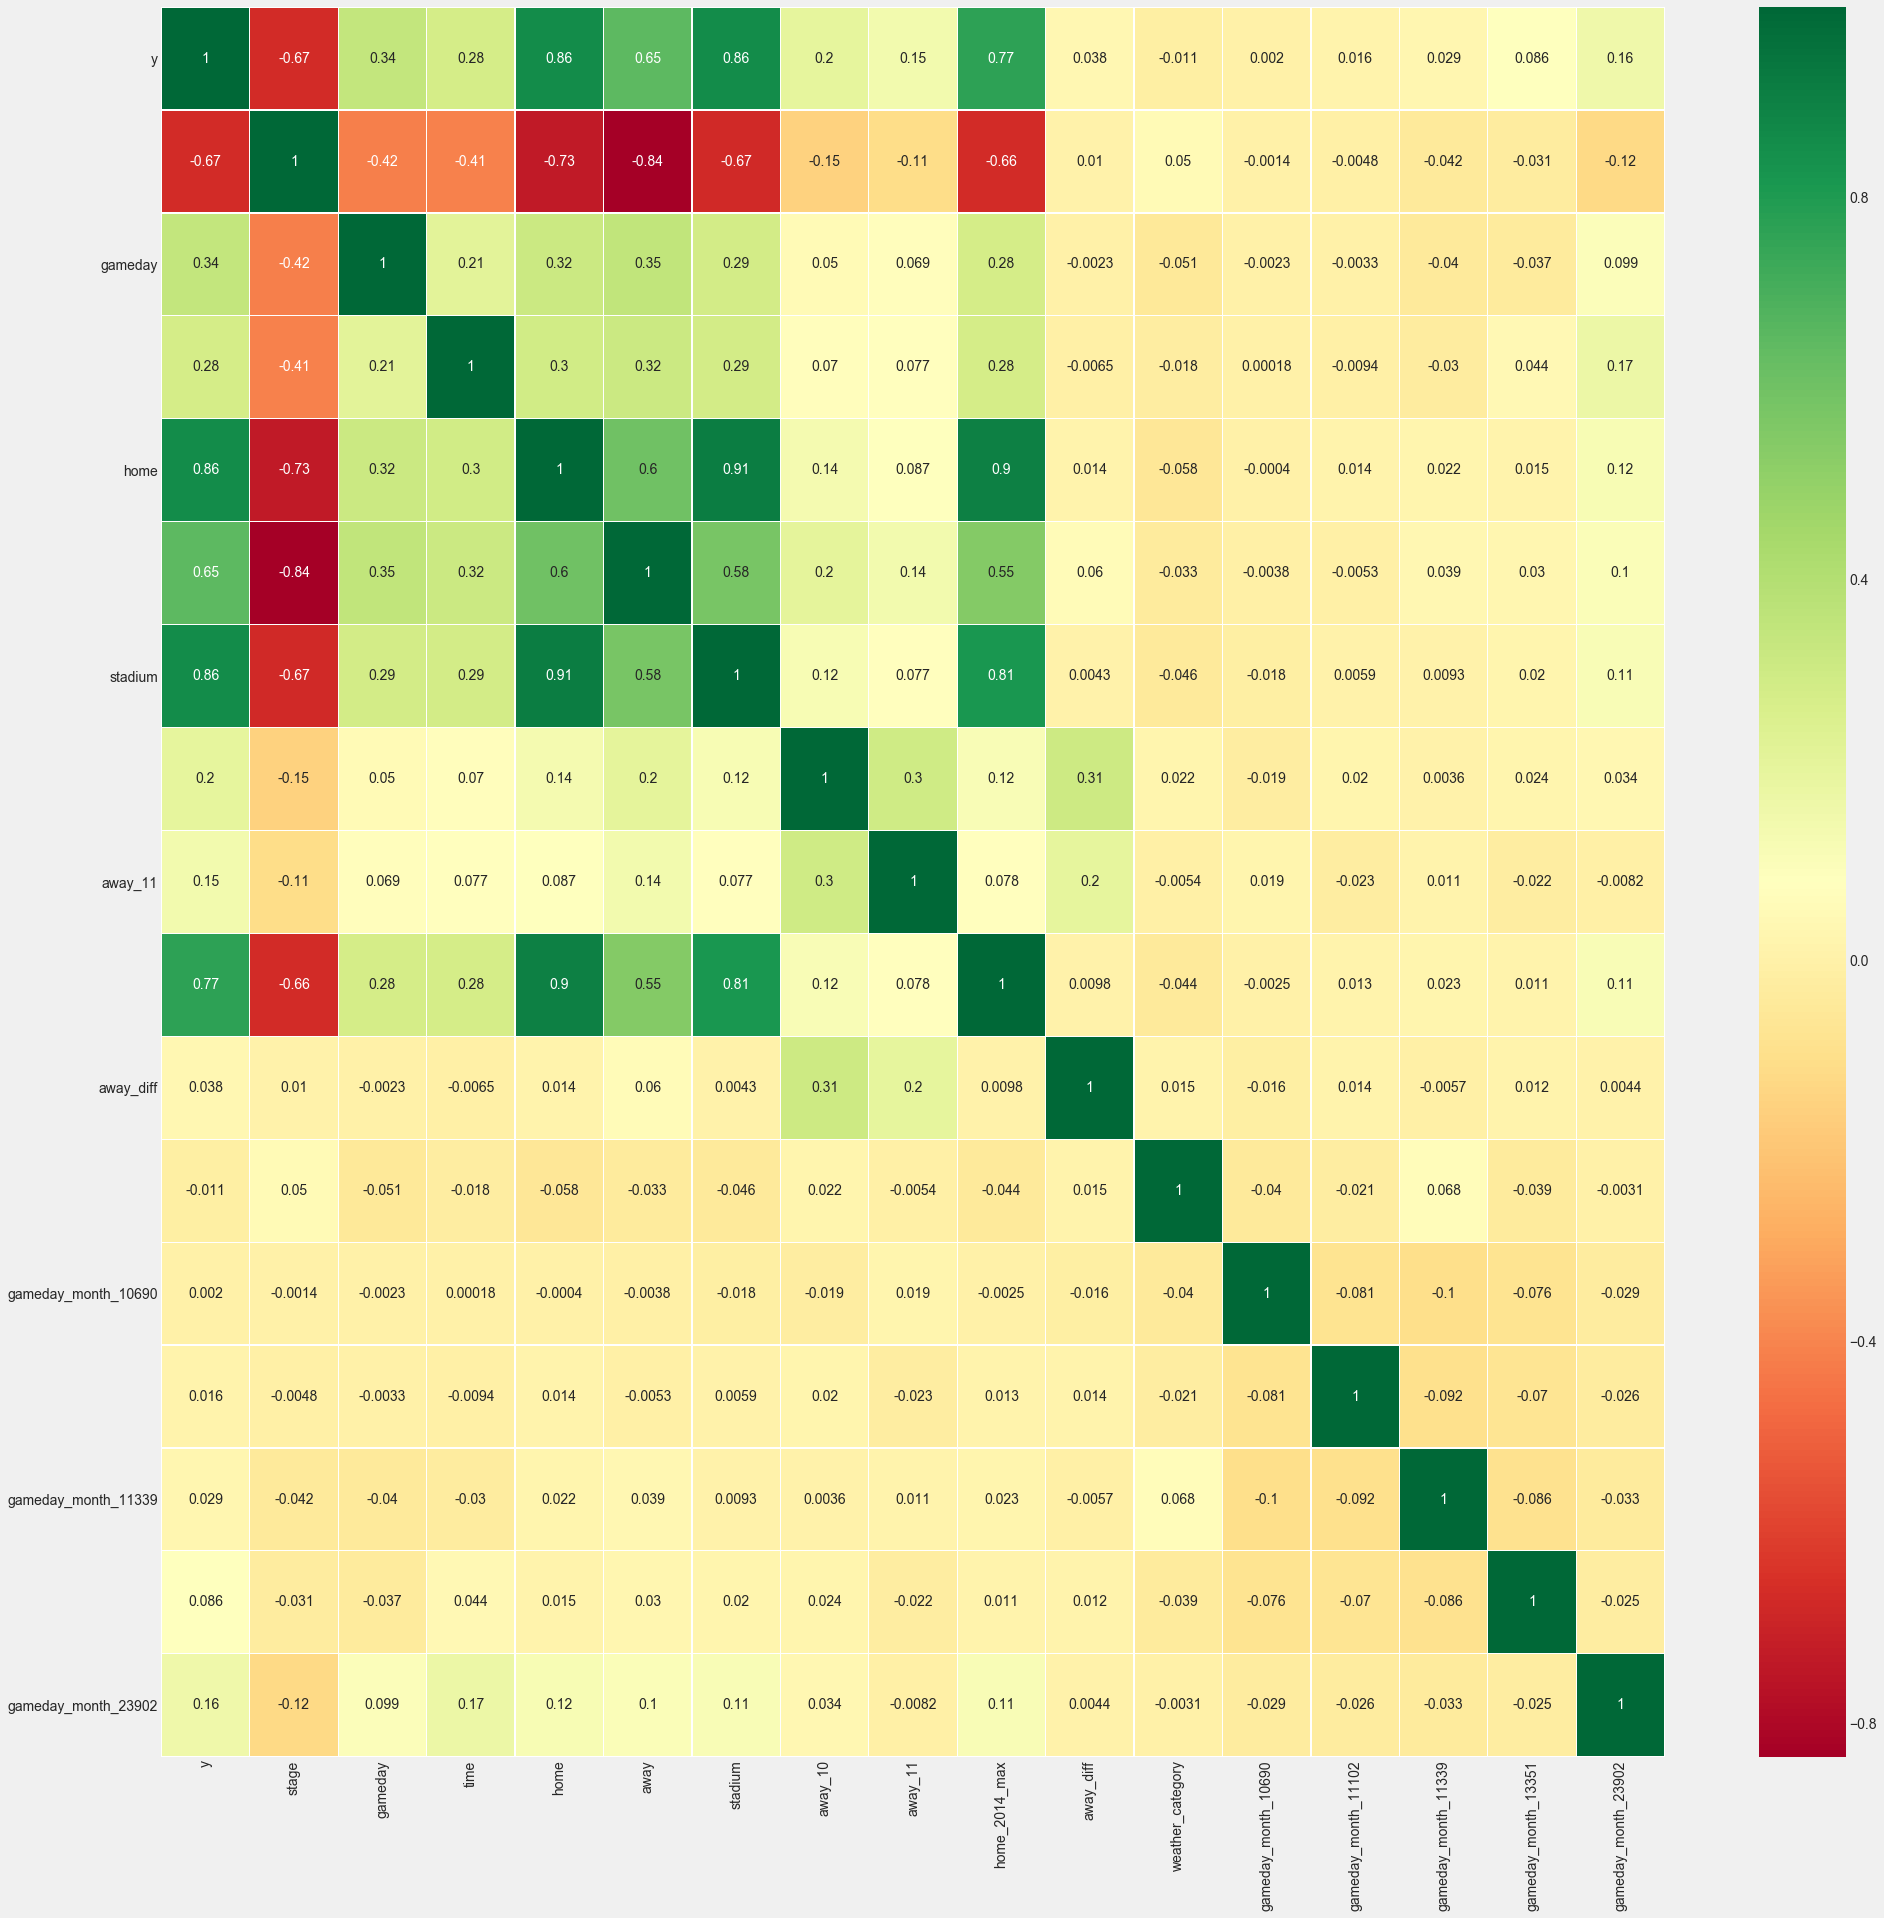

In [92]:
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(30,30)
plt.show()


In [437]:
train_df.corr()


,y,stage,gameday,time,home,away,stadium,away_10,away_11,home_2014_max,away_diff,weather_category,gameday_month_10690,gameday_month_11102,gameday_month_11339,gameday_month_13351,gameday_month_23902
y,1.000,-0.670,0.343,0.277,0.864,0.650,0.862,0.199,0.147,0.769,0.038,-0.011,0.002,0.016,0.029,0.086,0.158
stage,-0.670,1.000,-0.417,-0.410,-0.733,-0.835,-0.674,-0.148,-0.106,-0.664,0.010,0.050,-0.001,-0.005,-0.042,-0.031,-0.120
gameday,0.343,-0.417,1.000,0.212,0.317,0.353,0.290,0.050,0.069,0.281,-0.002,-0.051,-0.002,-0.003,-0.040,-0.037,0.099
time,0.277,-0.410,0.212,1.000,0.296,0.317,0.285,0.070,0.077,0.279,-0.006,-0.018,0.000,-0.009,-0.030,0.044,0.173
home,0.864,-0.733,0.317,0.296,1.000,0.605,0.915,0.138,0.087,0.902,0.014,-0.058,-0.000,0.014,0.022,0.015,0.123
away,0.650,-0.835,0.353,0.317,0.605,1.000,0.579,0.204,0.141,0.546,0.060,-0.033,-0.004,-0.005,0.039,0.030,0.104
stadium,0.862,-0.674,0.290,0.285,0.915,0.579,1.000,0.123,0.077,0.814,0.004,-0.046,-0.018,0.006,0.009,0.020,0.112
away_10,0.199,-0.148,0.050,0.070,0.138,0.204,0.123,1.000,0.302,0.117,0.306,0.022,-0.019,0.020,0.004,0.024,0.034
away_11,0.147,-0.106,0.069,0.077,0.087,0.141,0.077,0.302,1.000,0.078,0.203,-0.005,0.019,-0.023,0.011,-0.022,-0.008
home_2014_max,0.769,-0.664,0.281,0.279,0.902,0.546,0.814,0.117,0.078,1.000,0.010,-0.044,-0.003,0.013,0.023,0.011,0.114


In [93]:
print(train_df.shape)
print(test_df.shape)

(1952, 17)
(313, 16)


In [94]:
print(train_df.groupby('home').mean().sort_values('y'))
print(train_df.groupby('away').mean().sort_values('y'))
print(train_df.groupby('stage').mean().sort_values('y'))
print(train_df.groupby('away_10').mean().sort_values('y'))
print(train_df.groupby('away_11').mean().sort_values('y'))

              y  stage  gameday      time      away   stadium  away_10  \
home                                                                     
3200   3266.426  2.000   82.074  9986.833  7164.815  3266.000    0.000   
3300   3348.125  2.000   86.781 10095.688  7053.125  3594.031    0.000   
3400   3483.125  2.000   85.094 10006.719  7159.375  3460.000    0.000   
3600   3618.857  2.000   75.063  9183.000  6988.889  3640.302    0.000   
3800   3847.182  2.000   80.309 11065.655  7167.273  3847.000    0.000   
4000   4043.037  2.000   77.759  9279.574  7216.667  4043.000    0.000   
4300   4373.426  2.000   79.111  9343.630  7074.074  4373.000    0.000   
4500   4544.000  2.000   80.906  8788.925  7022.642  4544.000    0.000   
4800   4881.660  1.840   74.820  9795.280  8618.000  4881.000    0.020   
5200   5235.909  2.000   77.091 10074.055  7200.000  5235.545    0.000   
5400   5447.273  2.000   88.091  8664.758  7203.030  5446.909    0.000   
5500   5565.722  2.000   79.241  9496.

## データ分割

In [95]:
X_train = train_df.drop("y", axis=1)
y_train = train_df['y'].copy()
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify=X_train['stage'], test_size=0.25, random_state=0)
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify=X_train['stage'], test_size=0.3, random_state=0)
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify=X_train['home'], test_size=0.3, random_state=0)
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify=X_train['stadium'], test_size=0.3, random_state=0)
print(X_train.shape)
X_test = test_df
print(X_test.shape)

(1464, 16)
(313, 16)


In [176]:
# ランダムフォレスト
# パラメータを指定して、グリッドサーチしてみる
rf_parameters = {
    "n_estimators":[5, 10, 30, 50], # 決定木の個数
    "max_depth":[5, 10, 20, 30, 50], # 決定木の深さの最大値
    "random_state":[0]
}
reg_rf = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=rf_parameters,
    cv=5,
    n_jobs=-1
)


In [1056]:

%%time
reg_rf = reg_rf.fit(X_train, y_train)

CPU times: user 277 ms, sys: 168 ms, total: 445 ms
Wall time: 4.19 s


In [1057]:
print('train: {:.3f}'.format(reg_rf.score(X_train,y_train)))
print('train: {:.3f}'.format(reg_rf.score(X_valid,y_valid)))
rf_pred = reg_rf.predict(X_valid)
cal_rmse(y_valid, rf_pred)

train: 0.938
train: 0.813


3470.5486603010963

In [96]:
gbrt_parameters = {
    "loss":['ls', 'lad', 'huber', 'quantile'], #損失関数を最適化するもの
    "learning_rate":[0.01,0.1,1.0], #合計でいくつの決定木を学習させるか。
    #"n_estimators":[5, 10, 30, 50], # 後に学習させる決定木が､前の決定木の間違いをどれだけ強く修正するか
    "n_estimators":[90, 110, 130], # 後に学習させる決定木が､前の決定木の間違いをどれだけ強く修正するか
    "max_depth":[1,2,3,4,5], # 各木構造の最大深度。勾配ブースティングの特徴を反映させるには小さく設定するべき値。,
    "alpha":[0.5,0.9],
    "random_state":[0]
}

In [97]:
# 交差検証の数は関係なさそう！
gbrt = GridSearchCV(
    estimator=GradientBoostingRegressor(),
    param_grid=gbrt_parameters,
    cv=5,
    n_jobs=-1
)

NameError: name 'GradientBoostingRegressor' is not defined

In [987]:
%%time
gbrt = gbrt.fit(X_train, y_train)

CPU times: user 4.72 s, sys: 344 ms, total: 5.06 s
Wall time: 2min 58s


In [960]:
print(gbrt.best_estimator_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=110,
             presort='auto', random_state=0, subsample=1.0, verbose=0,
             warm_start=False)


In [961]:
print('train: {:.3f}'.format(gbrt.score(X_train,y_train)))
print('train: {:.3f}'.format(gbrt.score(X_valid,y_valid)))
gbrt_pred = gbrt.predict(X_valid)
cal_rmse(y_valid, gbrt_pred)

train: 0.940
train: 0.826


3349.458805114706

In [962]:
X_test = test_df
y_pred = gbrt.predict(X_test)
sub = pd.read_csv('../data/raw/sample_submit.csv', header=None)
sub[1] = y_pred
sub.describe()

,0,1
count,313.000,313.000
mean,16142.252,10956.204
std,224.441,6833.169
min,15822.000,3032.060
25%,15907.000,6728.734
50%,16261.000,8977.377
75%,16346.000,13944.024
max,16436.000,42472.474


In [964]:
sub.to_csv('../data/submission/20190731_6_3349_gbrt_submission.csv', index=False)

## スケール変換！！
- intの型のスケールをあわせる(min_max_scaller, standard_scaler)
- 日付がよさそう！！1

In [451]:
test_df.head()

,stage,gameday,time,home,away,stadium,away_10,away_11,home_2014_max,away_diff,weather_category,gameday_month_10690,gameday_month_11102,gameday_month_11339,gameday_month_13351,gameday_month_23902
0,1,144,11193,15300,15600,15309,0,0,18863,-3000,3,0,0,1,0,0
1,1,144,9079,15800,18600,15814,0,0,32099,900,3,0,0,1,0,0
2,1,144,11193,37200,11400,37248,0,0,54350,6000,3,0,0,1,0,0
3,1,144,11193,12800,18000,11348,0,0,14623,1100,3,0,0,1,0,0
4,1,144,11193,25100,19800,25154,0,0,35533,10000,3,0,0,1,0,0


In [337]:
print(X_train.head(5))
print(X_test.head(5))
print(X_train.info())
print(X_test.info())

      gameday   time   home   away  stadium  away_10  away_11  away_diff  \
1686       74  11193  13400  17900    13570        0        0      10000   
211       144  11193  15800  11400    15814        0        0       6000   
1494       74  13905   5800   5200    14599        0        0        100   
748        74   9386   5800   7700    14599        0        0       -300   
1478       74   9386   4800   7700     4881        0        0       -300   

      gameday_month_10690  gameday_month_11102  gameday_month_11339  \
1686                    0                    0                    0   
211                     1                    0                    0   
1494                    0                    0                    0   
748                     0                    0                    0   
1478                    0                    1                    0   

      gameday_month_13351  gameday_month_23902  
1686                    0                    0  
211               

### MinMaxScaler

In [188]:
from sklearn import preprocessing  
mnscaler = preprocessing.MinMaxScaler()  
mnscaler.fit(X_train)  
X_train = mnscaler.transform(X_train) 
#mnscaler.fit(X_valid) 
X_valid = mnscaler.transform(X_valid)  
X_test = mnscaler.transform(X_test)

### StandardScaler

In [147]:
stscaler = preprocessing.StandardScaler()
stscaler.fit(X_train)
X_train = stscaler.transform(X_train)
#mnscaler.fit(X_valid)
X_valid = stscaler.transform(X_valid)
X_test = stscaler.transform(X_test)

In [189]:
# 学習データとテストデータを別でスケール変換
print(X_train.min(axis=0))
print(X_valid.min(axis=0))
print(X_train.max(axis=0))
print(X_valid.max(axis=0))
print(X_train.sum(axis=0))
print(X_valid.sum(axis=0))
print(X_train.mean(axis=0))
print(X_valid.mean(axis=0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-4.24698589 -0.00704296 -0.72064872 -0.09412042 -0.29051902 -0.07222638
 -0.1263374  -0.07412493 -0.1144398   0.500025   -0.55130852 -0.30553764
 -0.25744557 -0.33786869 -0.24827176 -0.09090909]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[-2.19806631e+00 -7.04190165e-03 -7.20648725e-01 -9.41204153e-02
 -2.90519023e-01 -7.22263803e-02  7.91531262e+00  1.34907376e+01
 -1.14439797e-01  5.00025001e-01 -4.41701532e-01  3.27291919e+00
  3.88431617e+00  2.95972972e+00  4.02784426e+00  1.10000000e+01]
[1188.         1300.23076923 1032.79106933  417.88823529  588.70391061
  456.57813984   27.           14.          463.2360926   976.029
 1250.33333333  160.          135.          199.          120.
   18.        ]
[-1464.            -3.43662454  -351.67657774   -45.93076267
  -141.77328342   -35.2464736    -29.48605007    45.21620832
   -55.84662073   244.01220061  -234.22007116   -23.85637883
    56.60407711    -3.29759841    28.5074401

In [52]:
# 学習データとテストデータを同じようにスケール変換
print(X_train.min(axis=0))
print(X_valid.min(axis=0))
print(X_train.max(axis=0))
print(X_valid.max(axis=0))
print(X_train.sum(axis=0))
print(X_valid.sum(axis=0))
print(X_train.mean(axis=0))
print(X_valid.mean(axis=0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[831.         912.43356643 709.57720329 296.11470588 414.20670391
 322.43593656  21.           7.         329.09059033 676.8835
 868.33333333 120.          86.         143.          76.
  11.        ]
[357.         387.7972028  323.21386604 121.77352941 174.4972067
 124.07639338   6.           7.         134.14550227 299.1455
 382.          40.          49.          56.          44.
   7.        ]
[0.60834553 0.66796015 0.51945622 0.21677504 0.30322599 0.23604388
 0.01537335 0.00512445 0.24091551 0.49552233 0.63567594 0.08784773
 0.06295754 0.10468521 0.0556369  0.00805271]
[0.60921502 0.66176997 0.5515595  0.20780466 0.2977768  0.21173446
 0.01023891 0.01194539 0.22891724 0.5104872  0.65187713 0.06825939
 0.08361775 0.09556314 0.07508532 0.01194539]


In [114]:
#mnscaler = preprocessing.MinMaxScaler()
#mnscaler.fit(X_test)
X_test = mnscaler.transform(X_test)

In [190]:
# 学習データとテストデータを別でスケール変換
print(X_test.min(axis=0))
print(X_test.max(axis=0))
print(X_test.sum(axis=0))
print(X_test.mean(axis=0))

[0.         0.         0.17943596 0.         0.         0.02179107
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
[1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
[174.         232.04195804 168.54065805  71.93823529 103.8603352
  77.65416391   1.           0.          79.30109291 156.9065
 195.          82.          70.          90.          62.
   9.        ]
[0.55591054 0.74134811 0.53846856 0.22983462 0.33182216 0.24809637
 0.00319489 0.         0.25335812 0.50129872 0.62300319 0.26198083
 0.22364217 0.28753994 0.19808307 0.02875399]


In [191]:
# 学習データとテストデータを同じようにスケール変換
print(X_test.min(axis=0))
print(X_test.max(axis=0))
print(X_test.sum(axis=0))
print(X_test.mean(axis=0))

[0.         0.         0.17943596 0.         0.         0.02179107
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
[1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
[174.         232.04195804 168.54065805  71.93823529 103.8603352
  77.65416391   1.           0.          79.30109291 156.9065
 195.          82.          70.          90.          62.
   9.        ]
[0.55591054 0.74134811 0.53846856 0.22983462 0.33182216 0.24809637
 0.00319489 0.         0.25335812 0.50129872 0.62300319 0.26198083
 0.22364217 0.28753994 0.19808307 0.02875399]


In [192]:
print(X_train.shape)
print(X_test.shape)

(1952, 16)
(313, 16)


# 計測ー

In [457]:
train_df.describe()

,y,stage,gameday,time,home,away,stadium,away_10,away_11,home_2014_max,away_diff,weather_category,gameday_month_10690,gameday_month_11102,gameday_month_11339,gameday_month_13351,gameday_month_23902
count,1952.000,1952.000,1952.000,1952.000,1952.000,1952.000,1952.000,1952.000,1952.000,1952.000,1952.000,1952.000,1952.000,1952.000,1952.000,1952.000,1952.000
mean,10635.004,1.609,96.253,10634.588,10478.791,10598.463,10634.547,0.014,0.007,17154.546,0.297,2.922,0.082,0.069,0.102,0.061,0.009
std,8100.816,0.488,46.698,2241.248,7021.111,5264.546,6983.480,0.117,0.084,11790.926,3764.924,1.012,0.274,0.254,0.303,0.240,0.096
min,1104.000,1.000,1.000,6132.000,3200.000,5200.000,2509.000,0.000,0.000,5581.000,-10000.000,1.000,0.000,0.000,0.000,0.000,0.000
25%,4690.750,1.000,74.000,9079.000,5200.000,6000.000,5491.000,0.000,0.000,8018.000,-1000.000,3.000,0.000,0.000,0.000,0.000,0.000
50%,8600.500,2.000,74.000,11193.000,9000.000,8900.000,9522.000,0.000,0.000,12658.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000
75%,13472.250,2.000,144.000,11193.000,13400.000,15900.000,13570.000,0.000,0.000,20633.000,1100.000,4.000,0.000,0.000,0.000,0.000,0.000
max,62632.000,2.000,144.000,14642.000,37200.000,23100.000,37248.000,1.000,1.000,54350.000,10000.000,4.000,1.000,1.000,1.000,1.000,1.000


In [458]:
#sns.countplot(train_df['time'])

In [459]:
%%time
#reg_rf = reg_rf.fit(X_train, y_train)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs


In [2010]:
print('train: {:.3f}'.format(reg_rf.score(X_train,y_train)))
print('train: {:.3f}'.format(reg_rf.score(X_valid,y_valid)))
rf_pred = reg_rf.predict(X_valid)
cal_rmse(y_valid, rf_pred)

train: 0.952
train: 0.844


3177.5433096794336

In [99]:
gbrt_parameters = {
    "loss":['ls', 'lad', 'huber', 'quantile'], #損失関数を最適化するもの
    "learning_rate":[0.01, 0.05, 0.1, 0.15 ], #合計でいくつの決定木を学習させるか。
    "n_estimators":[30, 50, 100, 120, 150], # 後に学習させる決定木が､前の決定木の間違いをどれだけ強く修正するか
    #"n_estimators":[90, 110, 130], # 後に学習させる決定木が､前の決定木の間違いをどれだけ強く修正するか
    "max_depth":[2,3,4], # 各木構造の最大深度。勾配ブースティングの特徴を反映させるには小さく設定するべき値。,
    "alpha":[0.5,0.9],
    "random_state":[0]
}

In [100]:
# 交差検証の数は関係なさそう！
gbrt_gs = GridSearchCV(
    estimator=GradientBoostingRegressor(),
    param_grid=gbrt_parameters,
    cv=4,
    n_jobs=-1
)

In [101]:
%%time
#gbrt_default = GradientBoostingRegressor(random_state=0, learning_rate=0.1) 
#gbrt_default = gbrt_default.fit(X_train, y_train)
gbrt = gbrt_gs.fit(X_train, y_train)

CPU times: user 4.97 s, sys: 383 ms, total: 5.35 s
Wall time: 3min 9s


In [102]:
print(gbrt.best_estimator_)
# グリッドサーチを使ってない時に使えるやつ
#print(gbrt.feature_importances_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=150,
             presort='auto', random_state=0, subsample=1.0, verbose=0,
             warm_start=False)


In [199]:
# Standard
print(gbrt.best_estimator_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=150,
             presort='auto', random_state=0, subsample=1.0, verbose=0,
             warm_start=False)


In [103]:
print('train: {:.3f}'.format(gbrt.score(X_train,y_train)))
print('train: {:.3f}'.format(gbrt.score(X_valid,y_valid)))
print(gbrt.best_score_)
gbrt_pred = gbrt.predict(X_valid)
cal_rmse(y_valid, gbrt_pred)

train: 0.906
train: 0.858
0.8484849760407055


2902.2991264219204

In [131]:
print('train: {:.3f}'.format(gbrt_default.score(X_train,y_train)))
print('train: {:.3f}'.format(gbrt_default.score(X_valid,y_valid)))
print(gbrt_default.feature_importances_)
#print(gbrt_default.best_score_)
gbrt_pred = gbrt_default.predict(X_valid)
cal_rmse(y_valid, gbrt_pred)

train: 0.908
train: 0.860
[0.00057862 0.0454861  0.08634569 0.14223063 0.1599025  0.19955188
 0.05062957 0.02110171 0.07568356 0.05919222 0.03810487 0.02184818
 0.01221932 0.01295764 0.05178943 0.0223781 ]


2883.243648217828

In [76]:
results = pd.DataFrame(gbrt.cv_results_)
display(results.head(3))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_learning_rate,param_loss,param_max_depth,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.009,0.001,0.001,0.000,0.500,0.010,ls,1,5,0,"{'alpha': 0.5, 'learning_rate': 0.01, 'loss': 'ls', 'max_depth': 1, 'n_estimators': 5, 'random_state': 0}",0.043,0.045,0.043,0.044,0.001,634,0.046,0.046,0.047,0.047,0.001
1,0.007,0.003,0.001,0.000,0.500,0.010,ls,1,10,0,"{'alpha': 0.5, 'learning_rate': 0.01, 'loss': 'ls', 'max_depth': 1, 'n_estimators': 10, 'random_state': 0}",0.083,0.087,0.084,0.085,0.002,618,0.088,0.089,0.091,0.089,0.001
2,0.011,0.001,0.001,0.000,0.500,0.010,ls,1,30,0,"{'alpha': 0.5, 'learning_rate': 0.01, 'loss': 'ls', 'max_depth': 1, 'n_estimators': 30, 'random_state': 0}",0.215,0.226,0.220,0.220,0.004,580,0.227,0.231,0.234,0.231,0.003


In [127]:
X_train_pd = pd.DataFrame(X_train)

X_train_pd.columns =['stage',
'gameday',
'time',
'home',
'away',
'stadium',
'away_10',
'away_11',
'home_2014_max',                     
'away_diff',
'weather_category',
'gameday_month_10690',
'gameday_month_11102',
'gameday_month_11339',
'gameday_month_13351',
'gameday_month_23902']

def plot_feature_importance(model):
    n_features = X_train_pd.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train_pd.columns)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

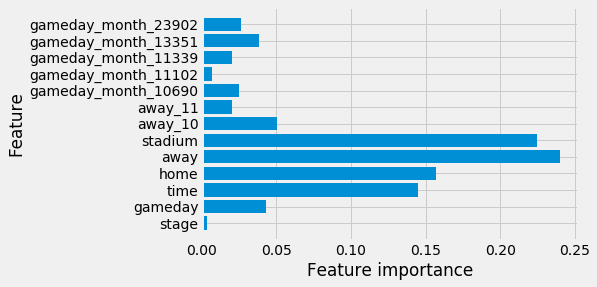

In [415]:
plot_feature_importance(gbrt)

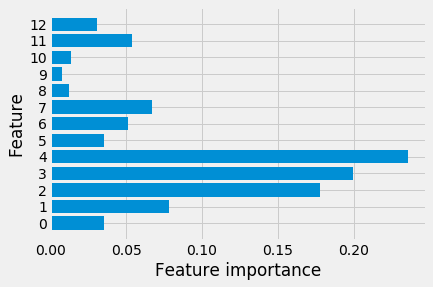

In [343]:
# stage削除のhomeで均等割
plot_feature_importance(gbrt)

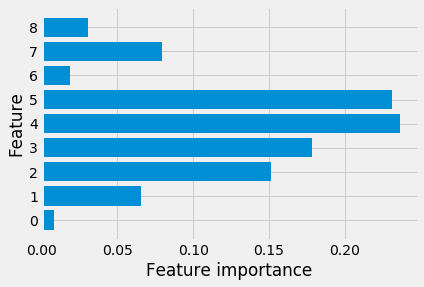

In [393]:
# away_11削る
plot_feature_importance(gbrt)

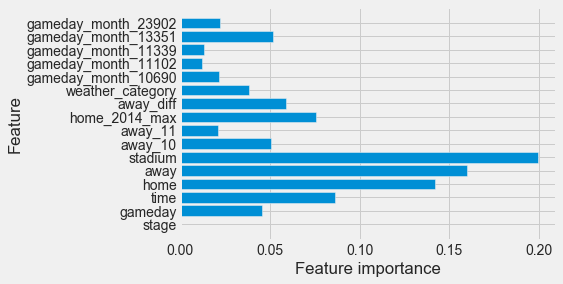

In [132]:
# 低いの全部削る削る
plot_feature_importance(gbrt_default)

In [92]:
# グリッドサーチ
plot_feature_importance(gbrt)

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

In [467]:
print('train: {:.3f}'.format(gbrt.score(X_train,y_train)))
print('train: {:.3f}'.format(gbrt.score(X_valid,y_valid)))
gbrt_pred = gbrt.predict(X_valid)
cal_rmse(y_valid, gbrt_pred)

train: 0.912
train: 0.843


3015.662239459032

In [1]:
print('train: {:.3f}'.format(gbrt_default.score(X_train,y_train)))
print('train: {:.3f}'.format(gbrt_default.score(X_valid,y_valid)))
gbrt_pred = gbrt_default.predict(X_valid)
cal_rmse(y_valid, gbrt_pred)


NameError: name 'gbrt_default' is not defined

In [133]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

reg = xgb.XGBRegressor()

reg_cv = GridSearchCV(reg, {'max_depth': [2,4,6], 'n_estimators': [50,100,200]}, verbose=1)
reg_cv.fit(X_train, y_train)
#print(reg_cv.best_params_, reg_cv.best_score_)
reg = xgb.XGBRegressor(**reg_cv.best_params_)
reg.fit(X_train, y_train)

pred_train = reg.predict(X_train)
pred_test = reg.predict(X_valid)
#print(mean_squared_error(y_train, pred_train))
#print(mean_squared_error(y_valid, pred_test))


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[10:51:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:51:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:51:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:51:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:51:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:51:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:51:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:51:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:51:04] W

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    4.0s finished


[10:51:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:51:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [134]:
print('train: {:.3f}'.format(reg.score(X_train, y_train)))
print('test: {:.3f}'.format(reg.score(X_valid, y_valid)))
xg_reg_pred = mlp.predict(X_valid)
cal_rmse(y_valid, xg_reg_pred)

train: 0.870
test: 0.875


3110.9397758213727

In [111]:
# ディープラーニンググリッド
#parameters = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
#clf = GridSearchCV(MLPRegressor(), parameters, n_jobs=-1)

#clf.fit(X_train, y_train)
#print(clf.score(X_train, y_train))
#print(clf.best_params_)

In [311]:
mlp = MLPRegressor(solver='lbfgs', random_state=0,max_iter=1000, alpha=1, hidden_layer_sizes=[10, 10])
mlp = mlp.fit(X_train, y_train)

In [312]:
print('train: {:.3f}'.format(mlp.score(X_train,y_train)))
print('train: {:.3f}'.format(mlp.score(X_valid,y_valid)))
mlp_pred = mlp.predict(X_valid)
cal_rmse(y_valid, mlp_pred)

train: 0.852
train: 0.802


3378.9940208901658

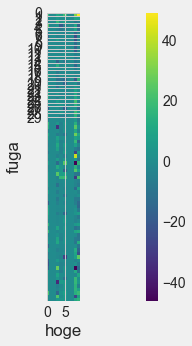

In [1306]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30))
plt.xlabel("hoge")
plt.ylabel("fuga")
plt.colorbar()

In [197]:
#X_test = test_df
#mnscaler.fit(X_test)
#X_test = mnscaler.transform(X_test)
#y_pred = gbrt_default.predict(X_test)
y_pred = gbrt.predict(X_test)
#y_pred = reg_rf.predict(X_test)
#y_pred = mlp.predict(X_test)
sub = pd.read_csv('../data/raw/sample_submit.csv', header=None)
sub[1] = y_pred
sub.describe()

,0,1
count,313.000,313.000
mean,16142.252,11669.802
std,224.441,7552.059
min,15822.000,2841.764
25%,15907.000,6444.789
50%,16261.000,9754.099
75%,16346.000,14748.638
max,16436.000,44110.791


In [94]:
print(X_test)

[[0.         1.         0.50608621 ... 1.         0.         0.        ]
 [0.         1.         0.203351   ... 1.         0.         0.        ]
 [0.         1.         0.50608621 ... 1.         0.         0.        ]
 ...
 [1.         0.51048951 0.89445797 ... 0.         1.         0.        ]
 [1.         0.51048951 0.89445797 ... 0.         1.         0.        ]
 [1.         0.51048951 0.89445797 ... 0.         1.         0.        ]]


In [256]:
# マイナスが出てきた謎はあるがひとまず行ってみるかー
sub[sub[1]<0].head()

,0,1


In [198]:
sub.to_csv('../data/submission/20190807_1_fulltraindata_gbrt_submission.csv', index=False)

学習データを削りに行くぞ！